In [1]:
import pandas as pd
data = pd.read_csv("Food_Delivery_Time_Prediction.csv")
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Weather_Conditions Traffic_Conditions Vehicle_Type
data['Weather_Conditions']= label.fit_transform(data['Weather_Conditions'])
data['Traffic_Conditions'] = label.fit_transform(data['Traffic_Conditions'])
data['Vehicle_Type'] = label.fit_transform(data['Vehicle_Type'])
data

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,Medium,Afternoon,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,Low,Night,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,High,Night,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,Medium,Evening,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,Low,Night,1,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,Medium,Night,1,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,Low,Night,0,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,Medium,Afternoon,1,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,Low,Night,2,3.9,4.8,53.94,354.39,85.25


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Distance', 'Delivery_Time']] = scaler.fit_transform(data[['Distance', 'Delivery_Time']])


In [7]:
data['cust_lat'] = data['Customer_Location'].str.strip("()").str.split(",").str[0].astype(float)


In [9]:
data['cust_long'] = data['Customer_Location'].str.strip("()").str.split(",").str[1].astype(float)


In [11]:
data['rest_lat'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[0].astype(float)


In [13]:
data['rest_long'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[1].astype(float)


In [61]:
# Convert latitude and longitude columns to float


In [15]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  # Distance in km

data['distance_km'] = data.apply(lambda row: haversine(row['cust_lat'], row['cust_long'], row['rest_lat'], row['rest_long']), axis=1)


In [17]:

data["Delivery_Time"].dtype

dtype('float64')

In [125]:
print(data["Delivery_Time"].isna().sum())  # Count NaN values


0


In [129]:
data["Delivery_Time"].max()

1.0

In [131]:
data["Delivery_Time"].min()

0.0

In [17]:
import numpy as np

data["Delivery_status"] = np.where(data["Delivery_Time"] >0.7, 1,0)
data



,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,Afternoon,2,...,3.0,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,Night,2,...,4.2,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,Night,1,...,3.4,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,Evening,1,...,3.7,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,Night,1,...,2.8,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,Night,1,...,4.0,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,Night,0,...,3.6,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,Afternoon,1,...,3.4,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,Night,2,...,4.8,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0


In [19]:
#Rush hour
import pandas as pd
time_mapping = {
    "Morning": 9,       # Assume morning means around 9 AM
    "Afternoon": 14,    # Afternoon around 2 PM
    "Evening": 18,      # Evening around 6 PM
    "Night": 21,        # Night around 9 PM
    "Late Night": 23    # Late night around 11 PM
}

# Map Order_Time text labels to numeric hours
data["Order_Time"] = data["Order_Time"].map(time_mapping)
data

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,3.0,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,4.2,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,3.4,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,3.7,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,2.8,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,4.0,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,3.6,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,3.4,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,4.8,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0


In [21]:
data["Rush_Hour"] = data["Order_Time"].apply(lambda x: 1 if (7 <= x <= 10 or 17 <= x <= 21) else 0)

# Display updated data
print(data[["Order_Time", "Rush_Hour"]].head())

   Order_Time  Rush_Hour
0          14          0
1          21          1
2          21          1
3          18          1
4          21          1


In [23]:
# Average delivery time per weather condition
weather_impact = data.groupby("Weather_Conditions")["Delivery_Time"].mean()
print(weather_impact)





Weather_Conditions
0    0.522373
1    0.553705
2    0.516672
3    0.519432
Name: Delivery_Time, dtype: float64


/tmp/ipykernel_8371/4265250327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather_Conditions", y="Delivery_Time", data=data, palette="coolwarm")


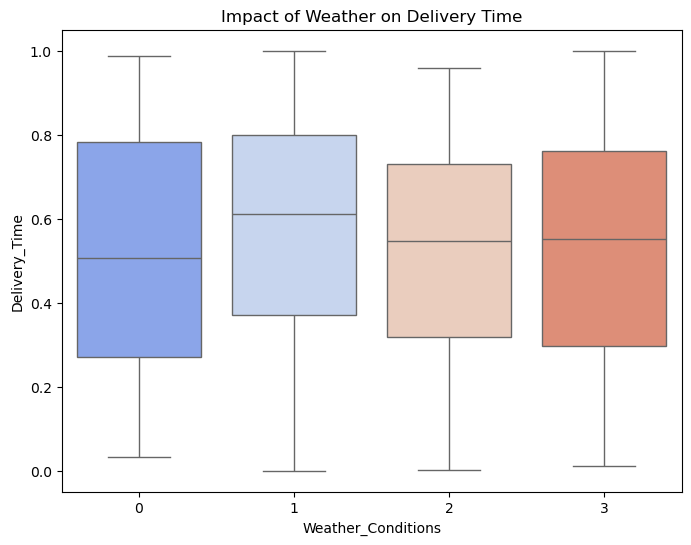

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0,1


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x="Weather_Conditions", y="Delivery_Time", data=data, palette="coolwarm")
plt.title("Impact of Weather on Delivery Time")
plt.show()
data

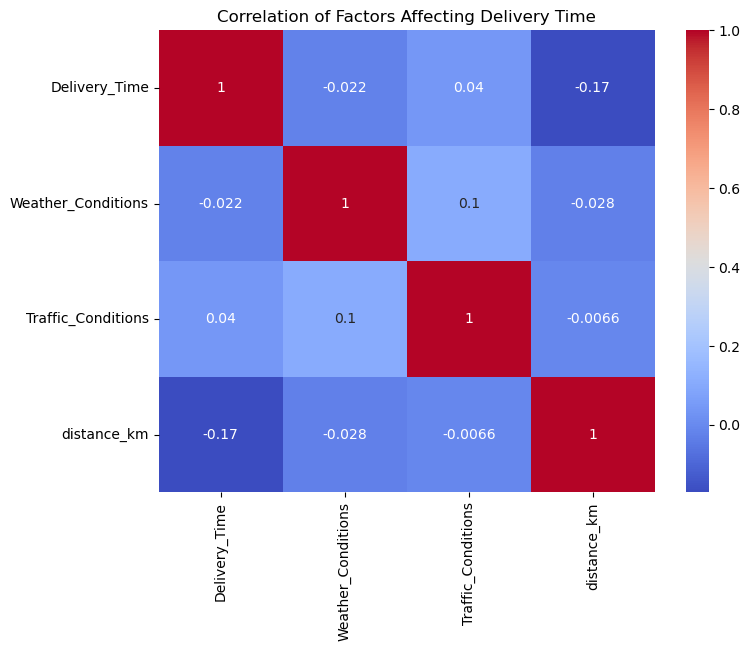

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0,1


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(data[["Delivery_Time", "Weather_Conditions", "Traffic_Conditions", 
                  "distance_km"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Factors Affecting Delivery Time")
plt.show()
data



In [63]:
pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 622.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'cv2'

In [29]:
import folium

# Create a base map centered at an average location
m = folium.Map(location=[data["cust_lat"].mean(), data["cust_long"].mean()], zoom_start=12)

# Add restaurant locations
for _, row in data.iterrows():
    folium.Marker([row["rest_lat"], row["rest_long"]], 
                  popup="Restaurant", 
                  icon=folium.Icon(color="blue", icon="cutlery")).add_to(m)

# Add customer locations
for _, row in data.iterrows():
    folium.Marker([row["cust_lat"], row["cust_long"]], 
                  popup="Customer", 
                  icon=folium.Icon(color="red", icon="home")).add_to(m)

# Save the map as an HTML file
m.save("delivery_map.html")
data

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0,1


In [115]:
import webbrowser

# Save the map
map_filename = "delivery_map.html"
m.save(map_filename)

# Open the map in the browser
webbrowser.open(map_filename)


True

In [89]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [73]:
import folium
import cv2
import numpy as np
from PIL import Image

def generate_map_image(order_id,cust_lat, cust_long, rest_lat, rest_long):
    m = folium.Map(location=[(cust_lat+rest_lat)/2, (cust_long+rest_long)/2], zoom_start=12)
    
    # Add restaurant marker
    folium.Marker([rest_lat, rest_long], popup="Restaurant", icon=folium.Icon(color="blue")).add_to(m)
    
    # Add customer marker
    folium.Marker([cust_lat, cust_long], popup="Customer", icon=folium.Icon(color="red")).add_to(m)
    
    # Save as HTML
    map_file = f"img_html/{order_id}.html"
    m.save(map_file)

    # Convert HTML map to PNG (manual step needed or use Selenium)
    return map_file

# Example usag
for _, row in data.iterrows():
    generate_map_image(row["Order_ID"], row["cust_lat"], row["cust_long"], row["rest_lat"], row["rest_long"])
data

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0,1


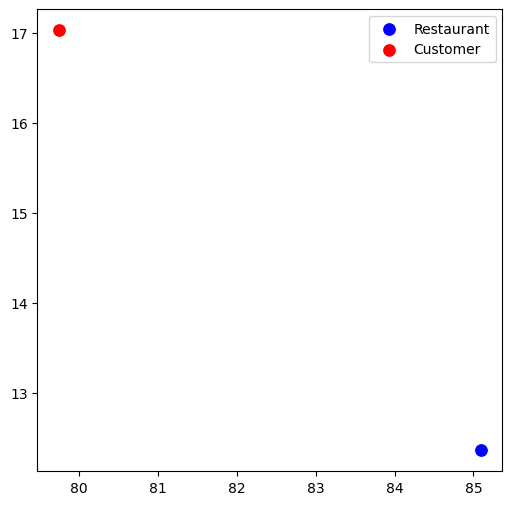

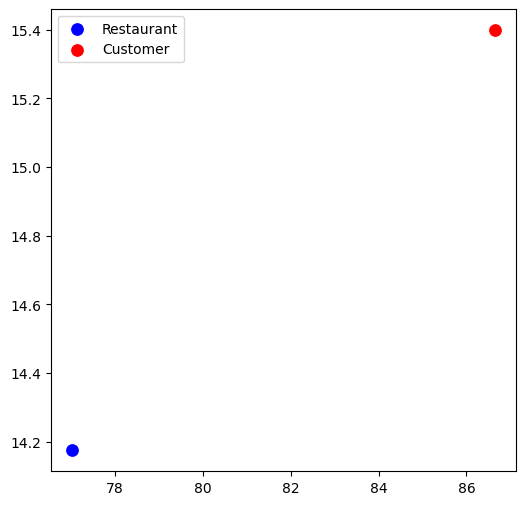

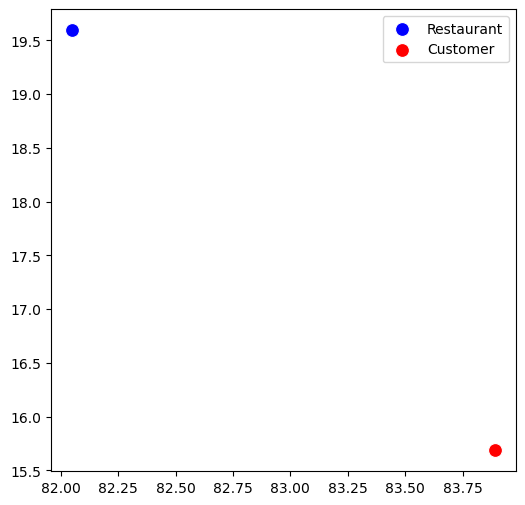

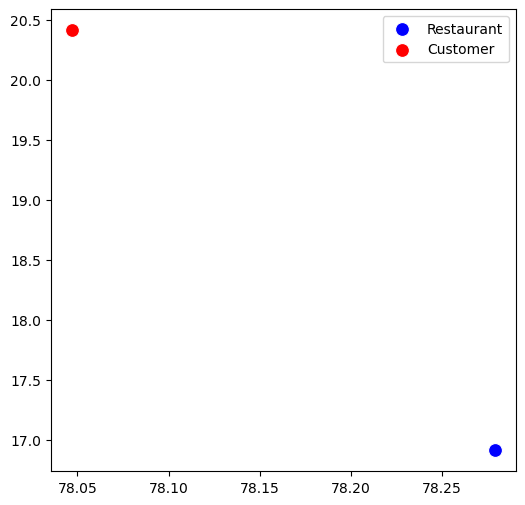

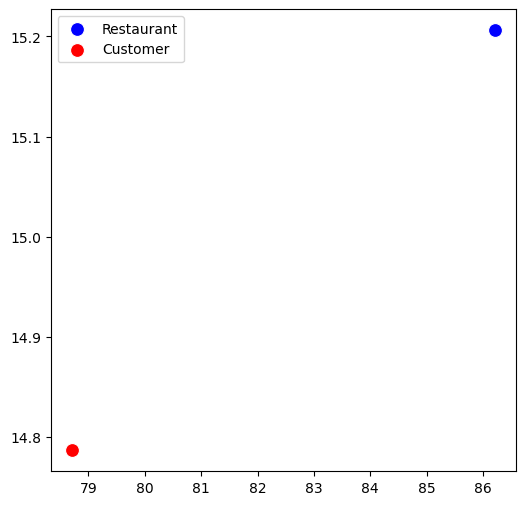

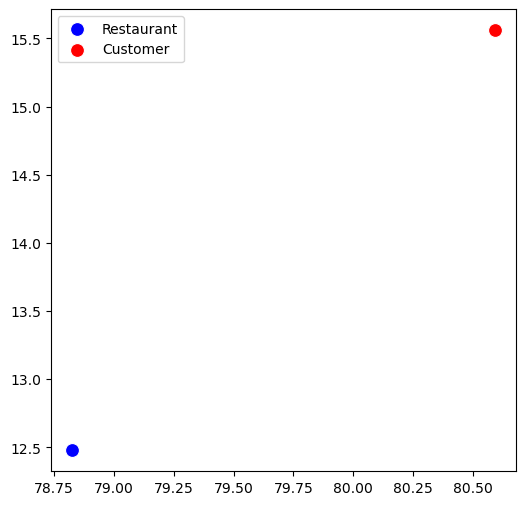

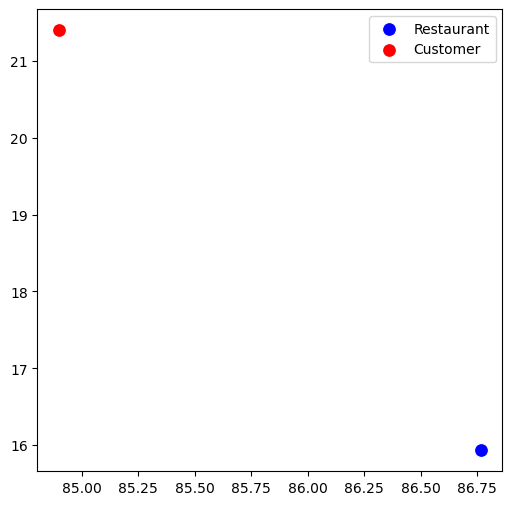

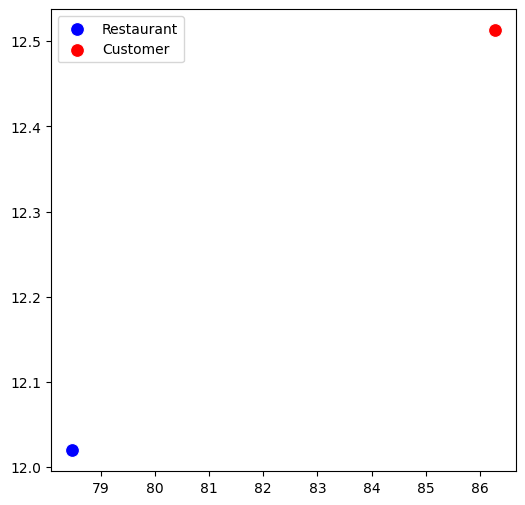

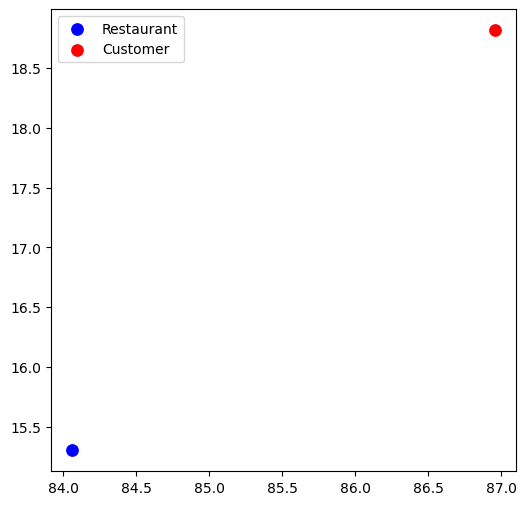

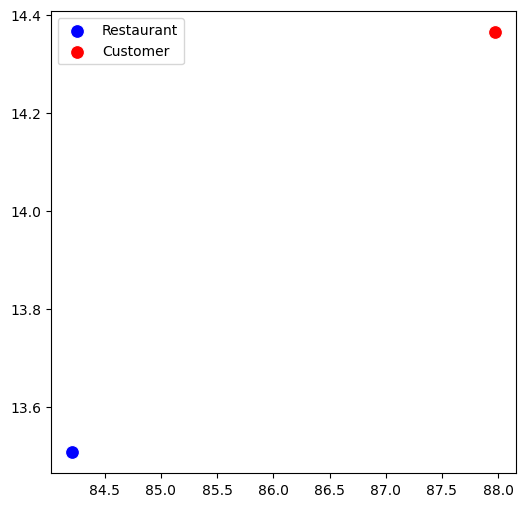

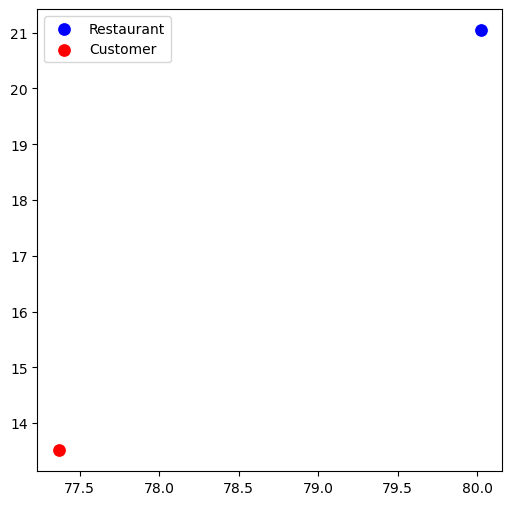

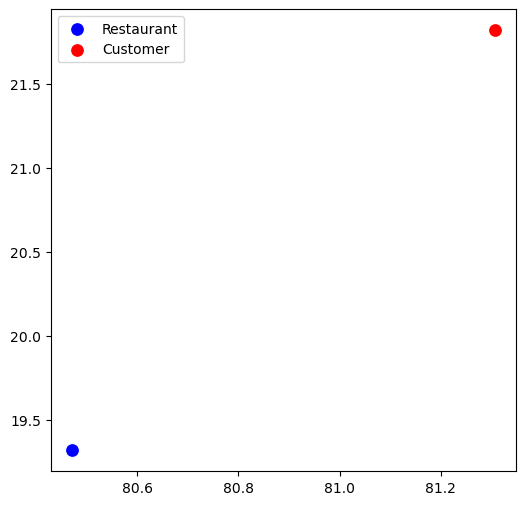

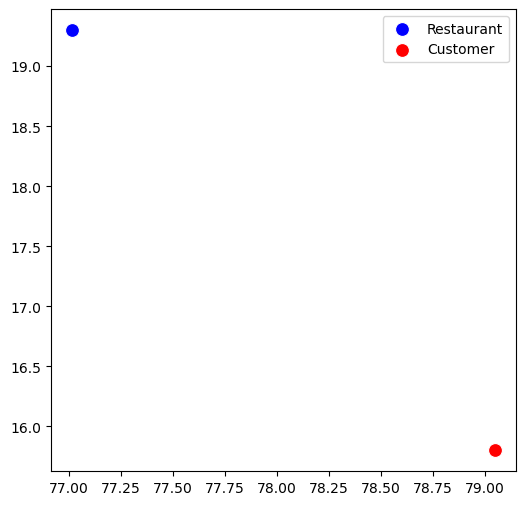

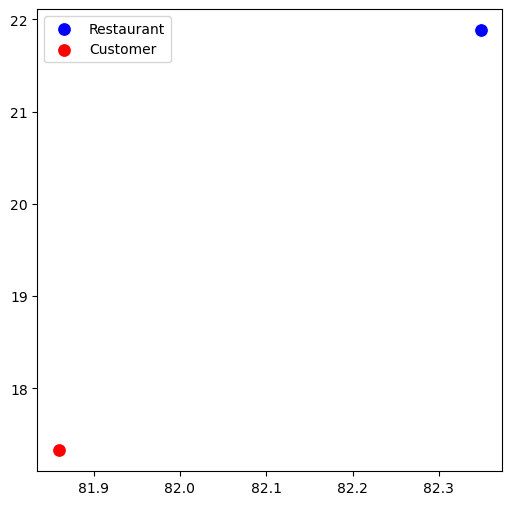

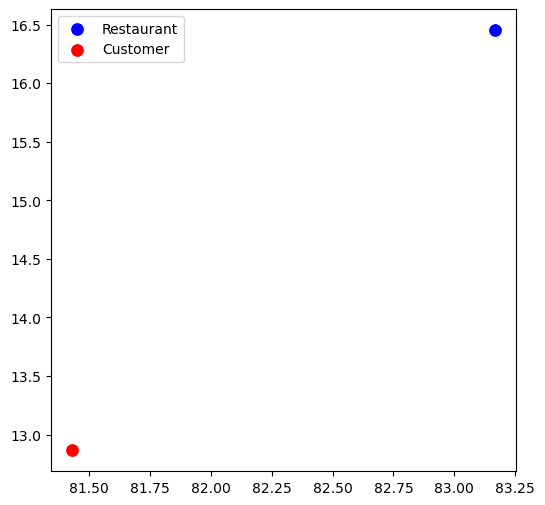

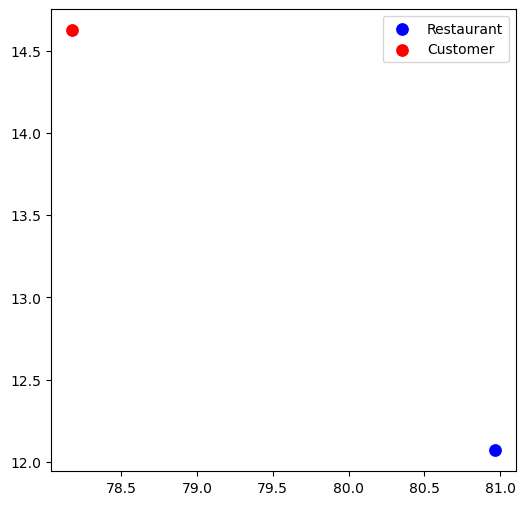

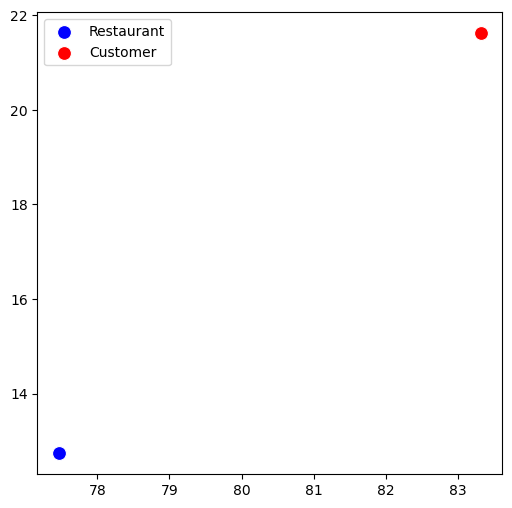

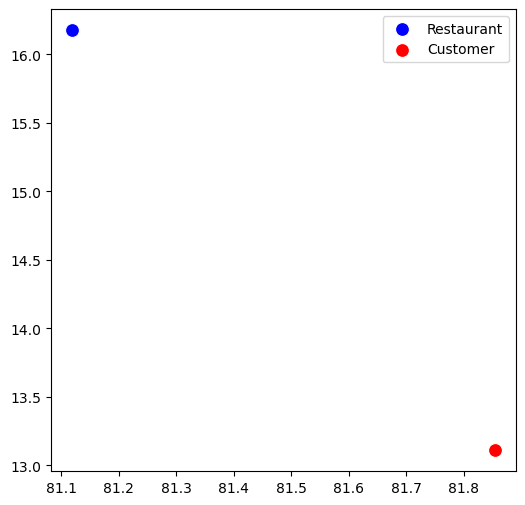

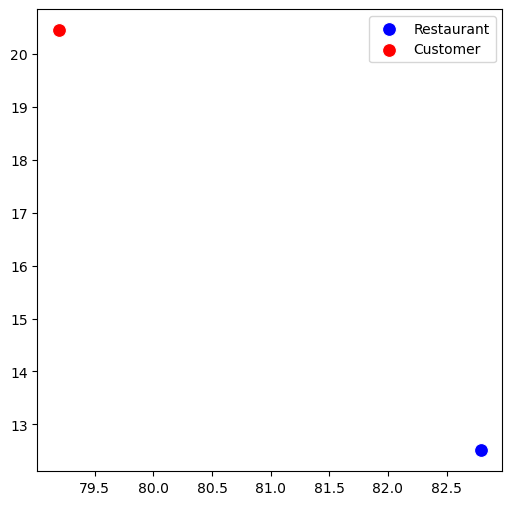

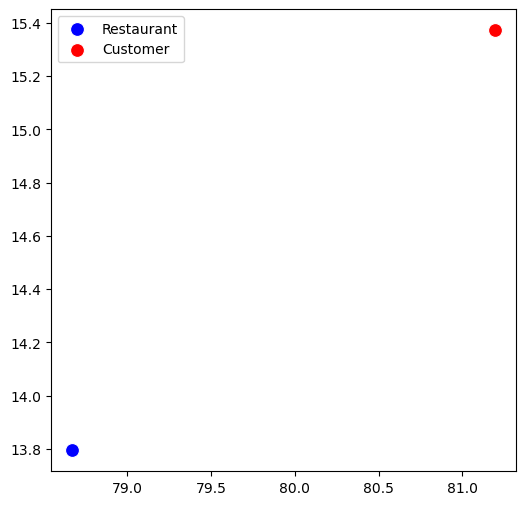

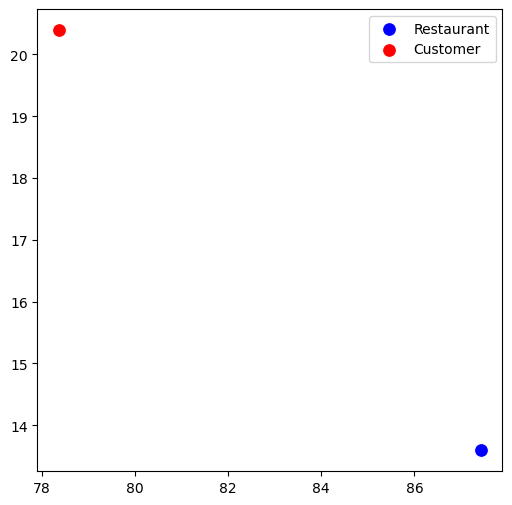

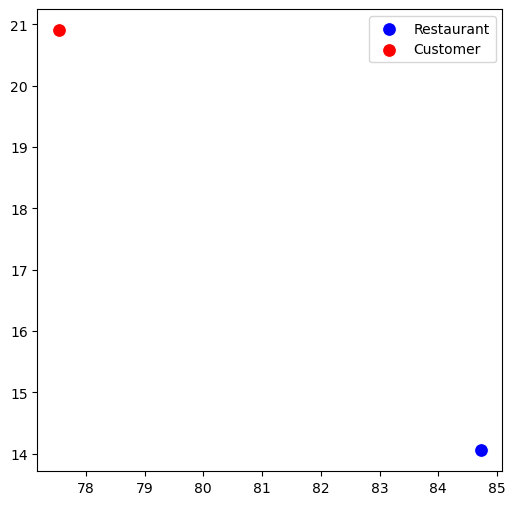

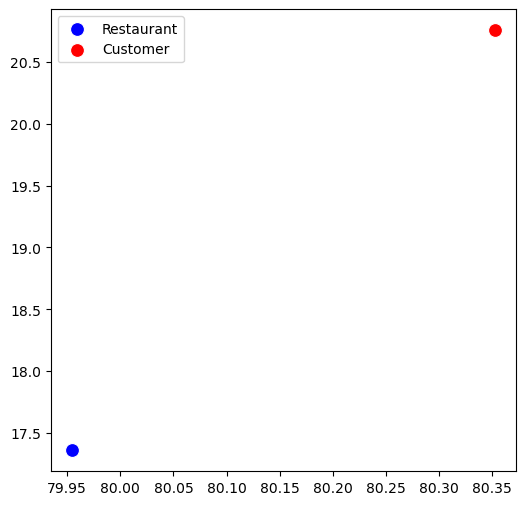

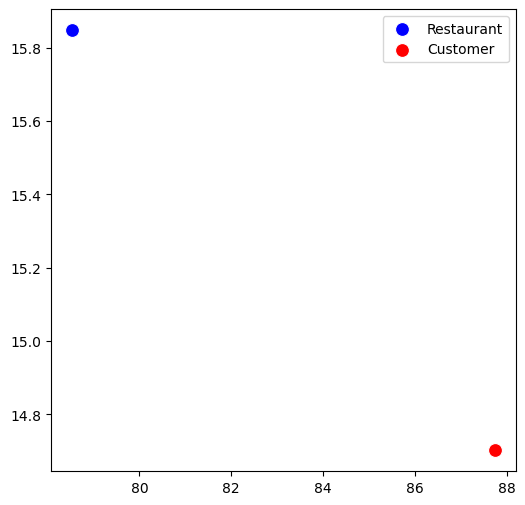

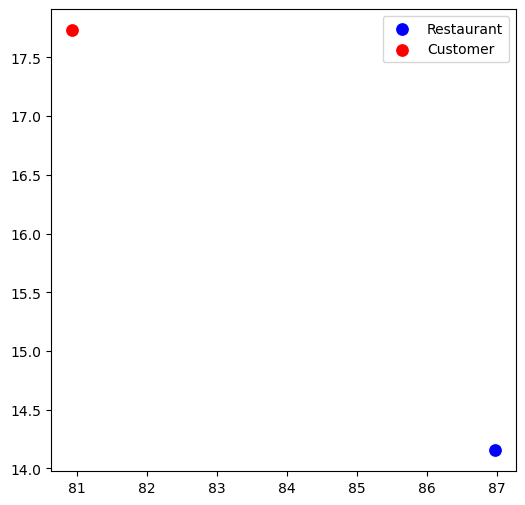

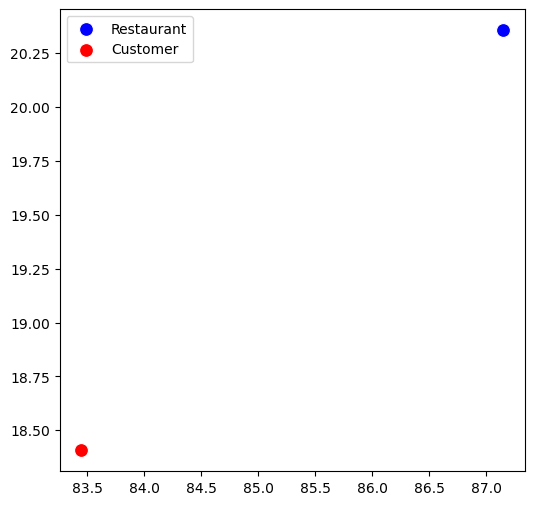

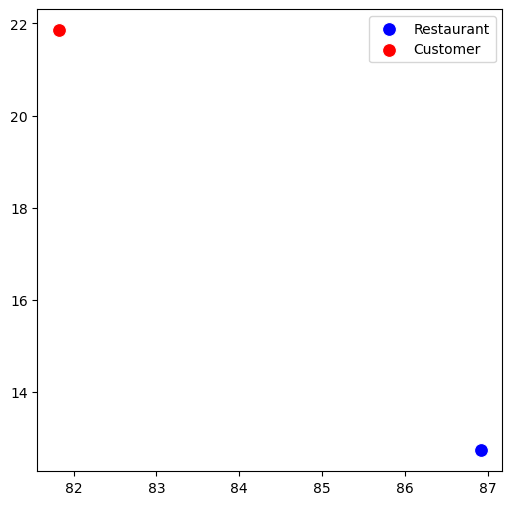

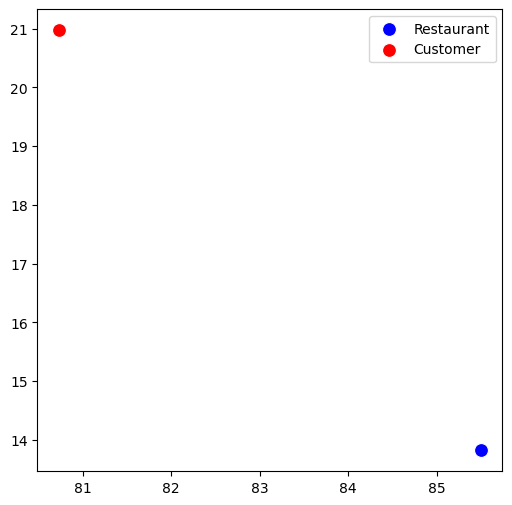

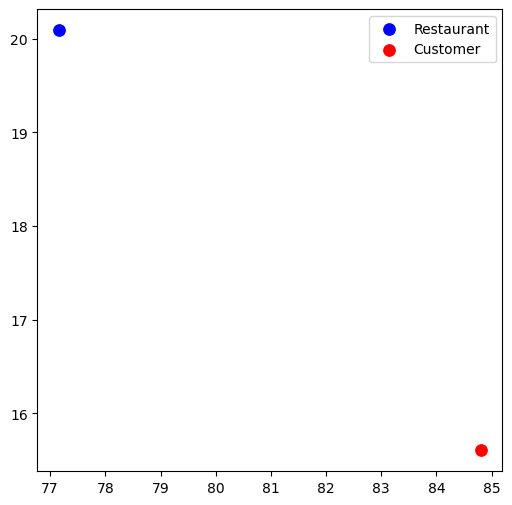

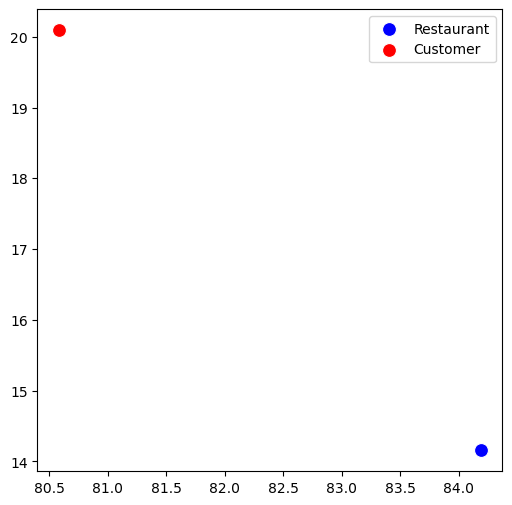

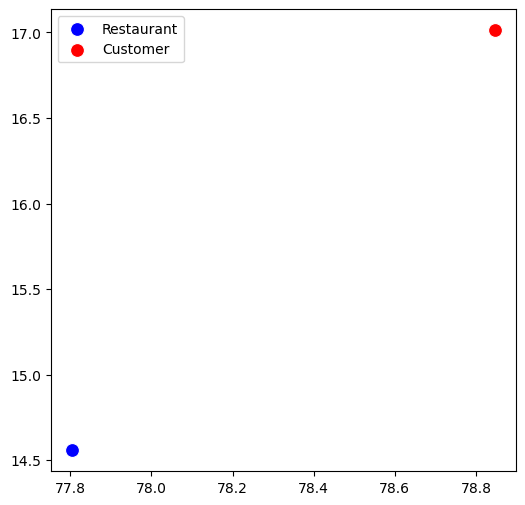

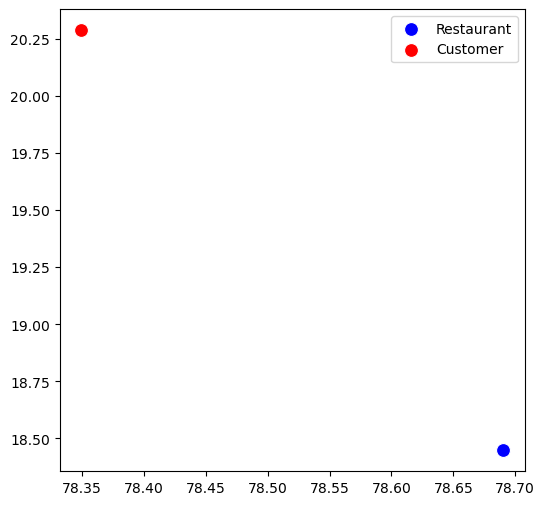

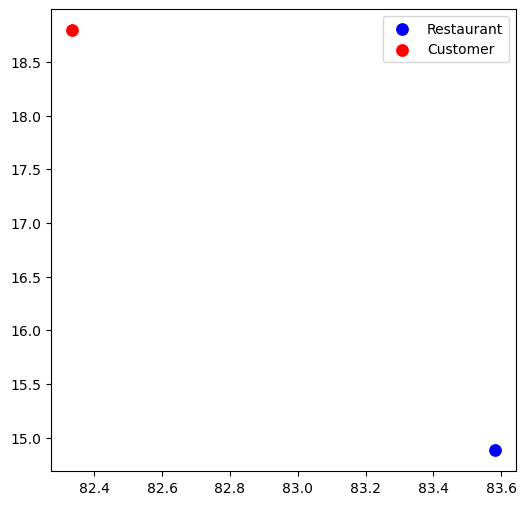

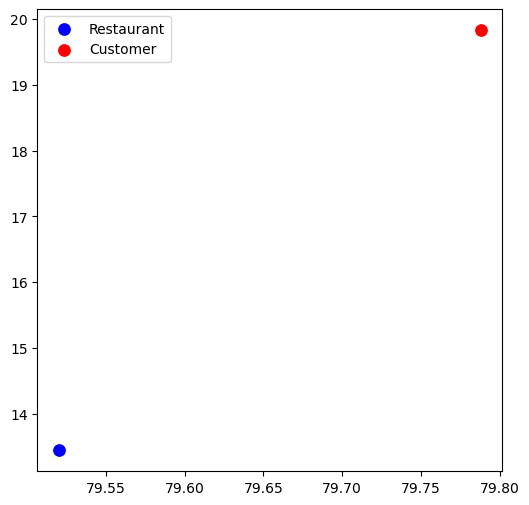

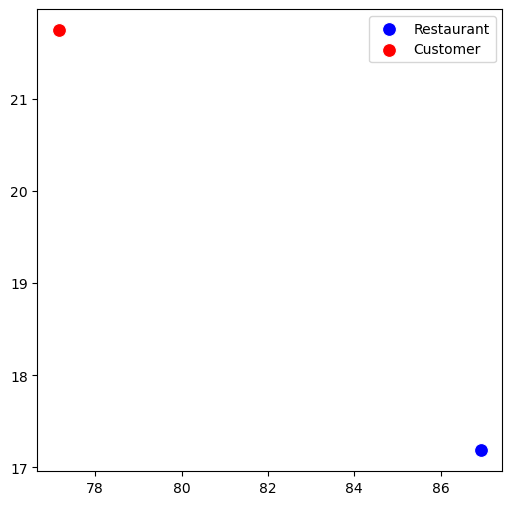

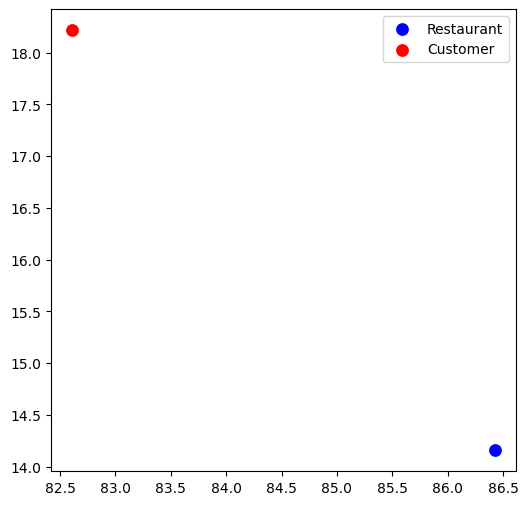

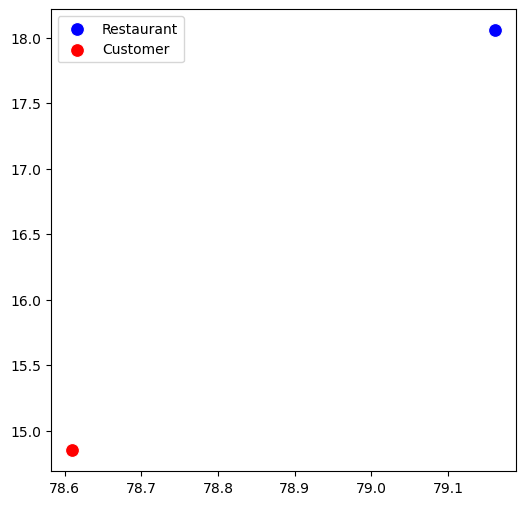

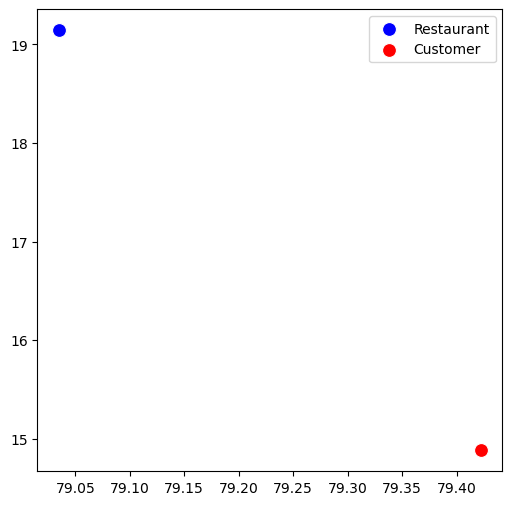

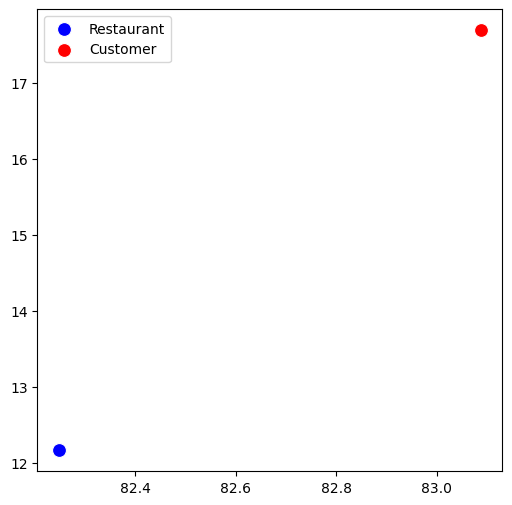

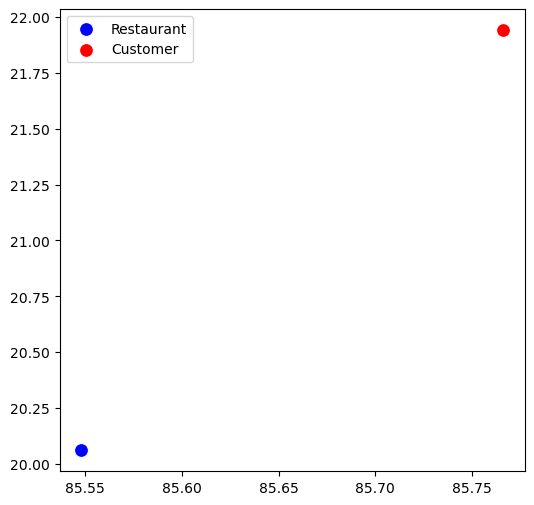

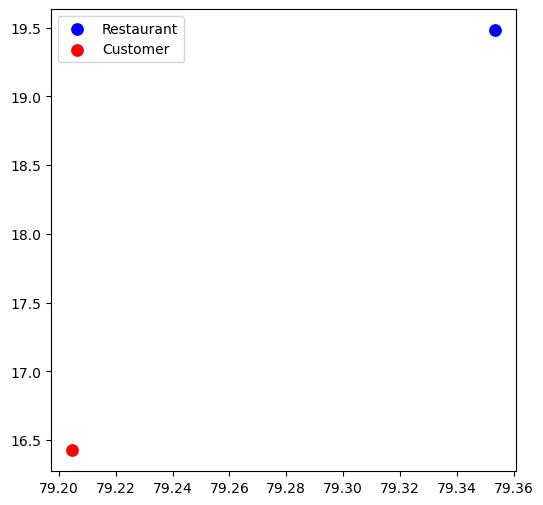

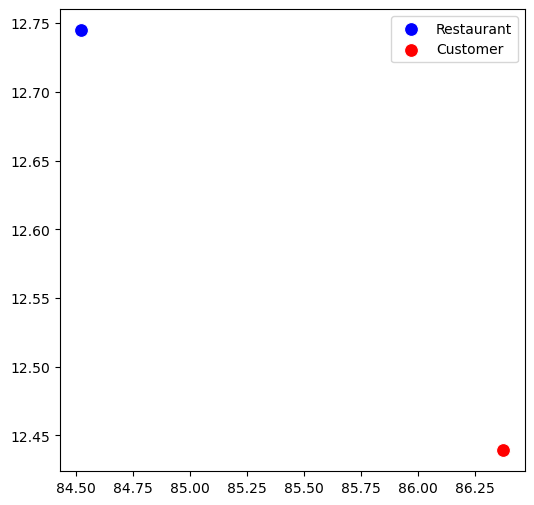

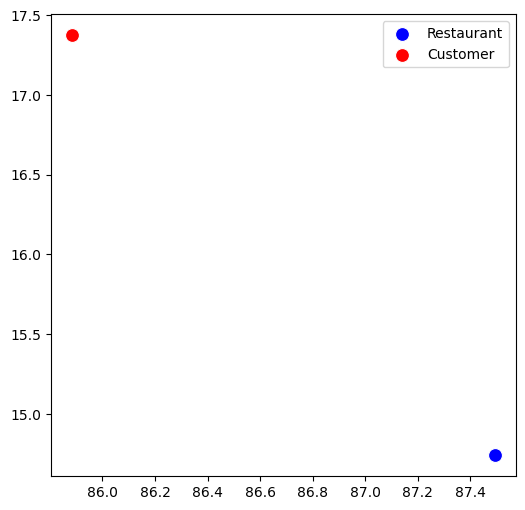

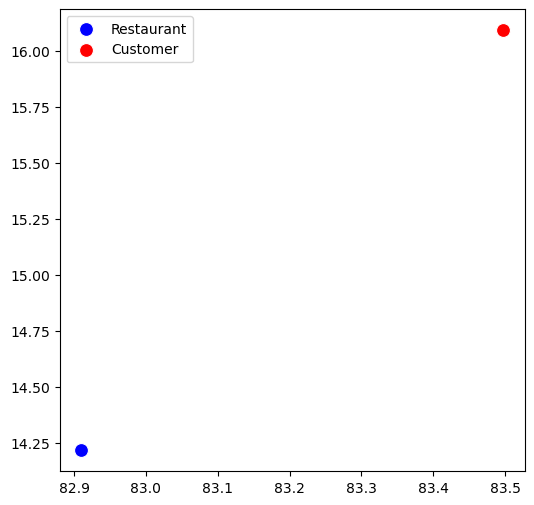

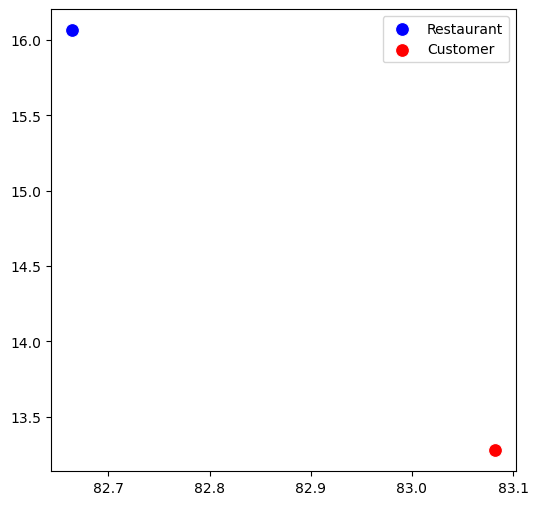

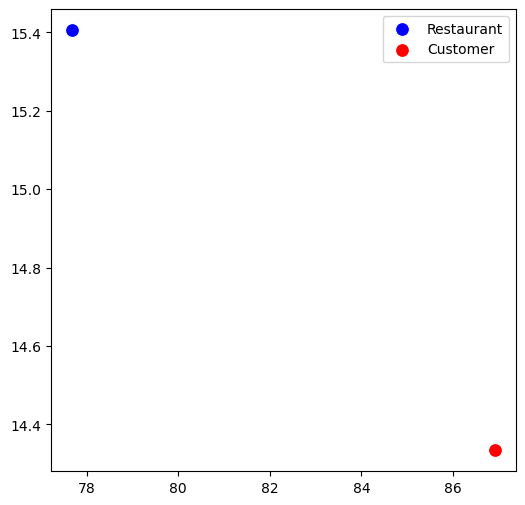

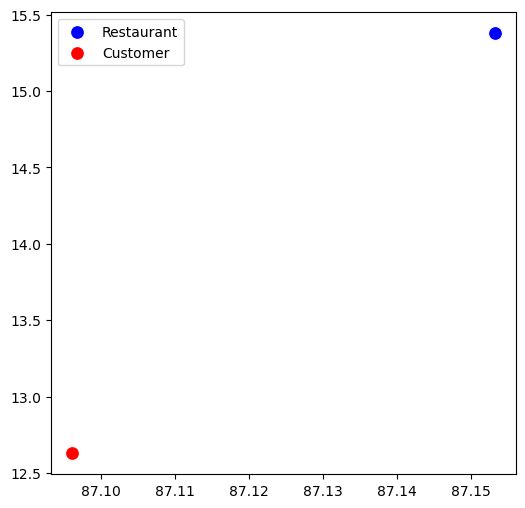

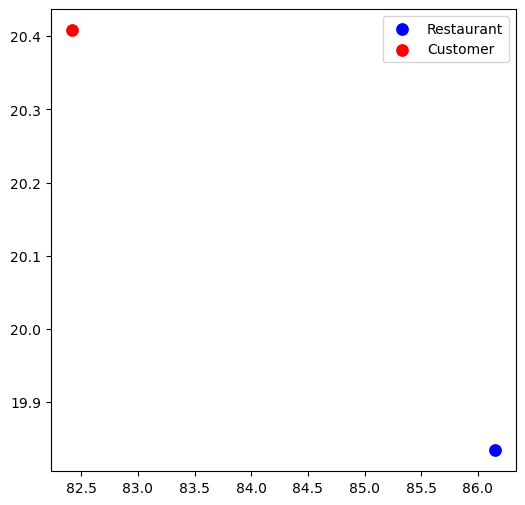

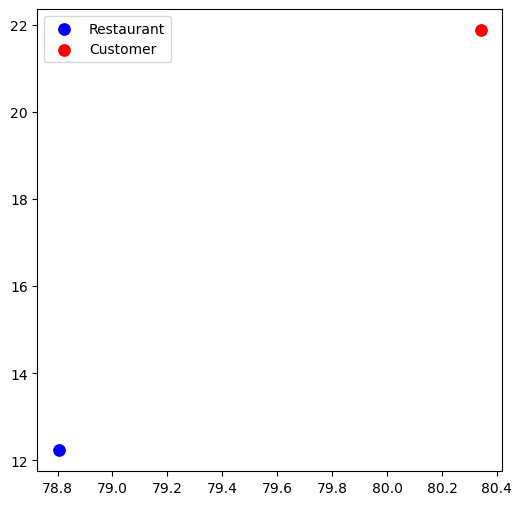

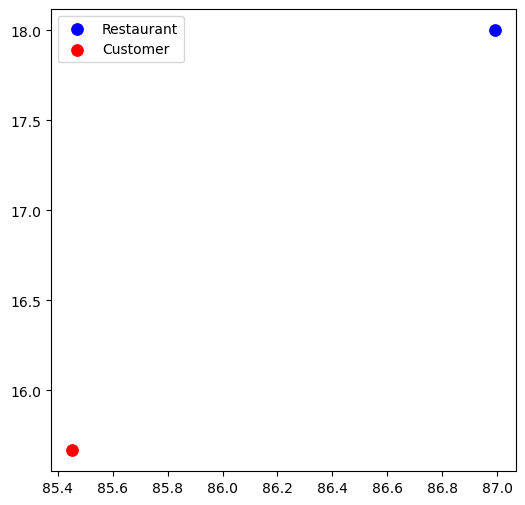

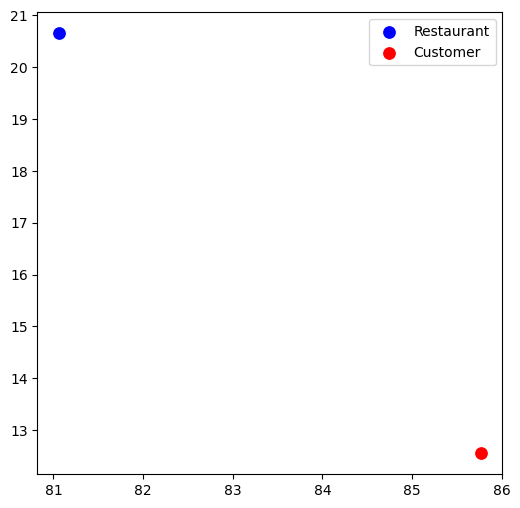

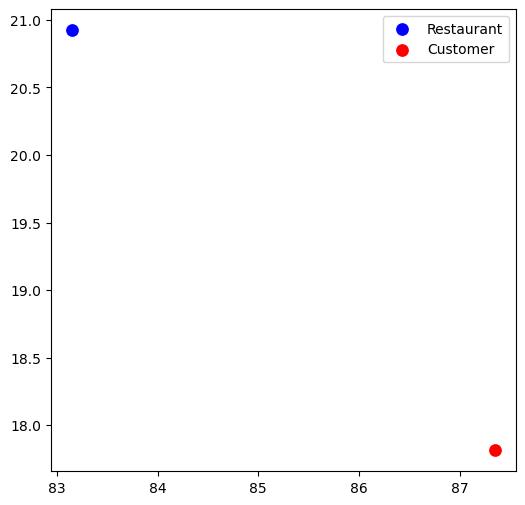

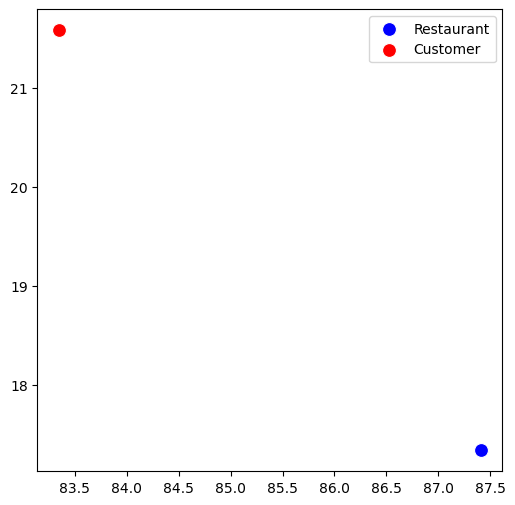

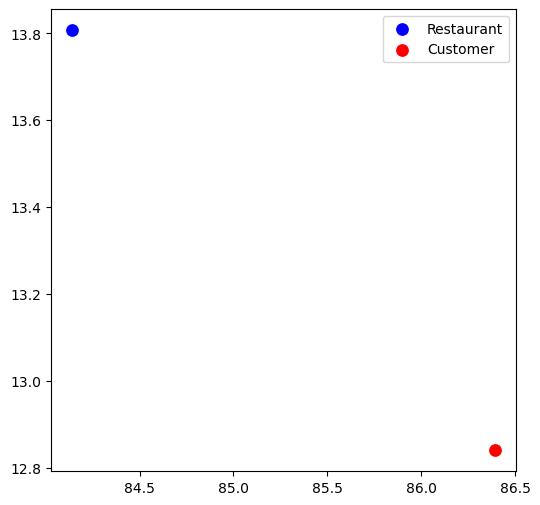

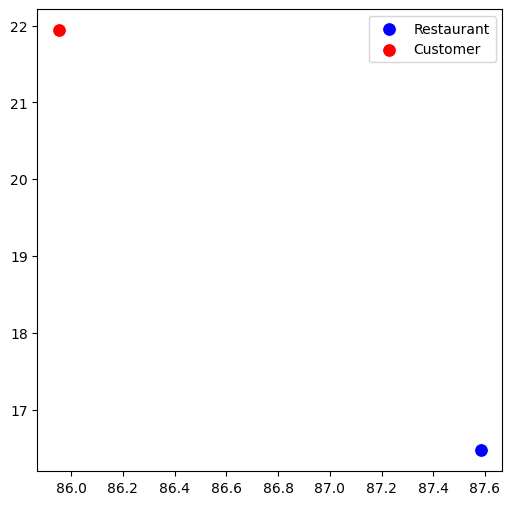

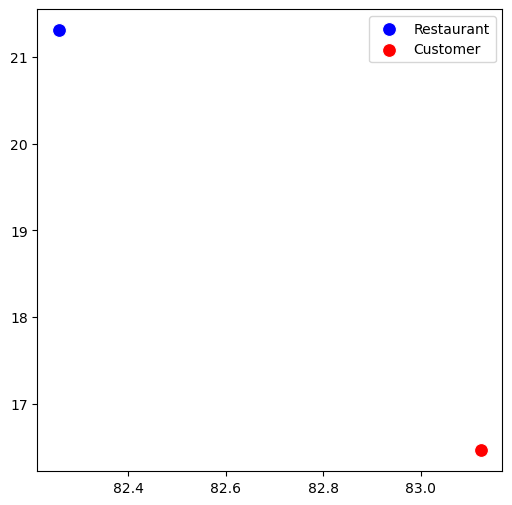

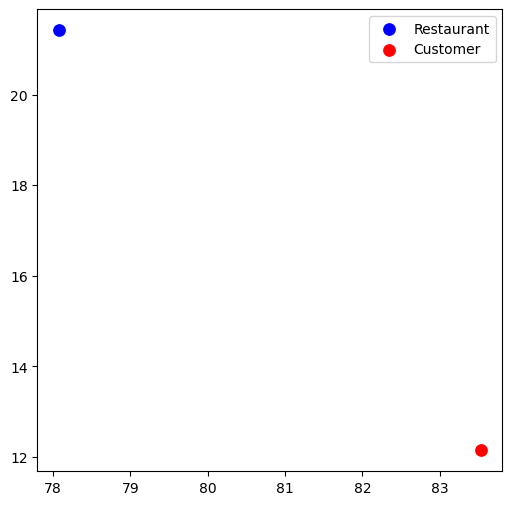

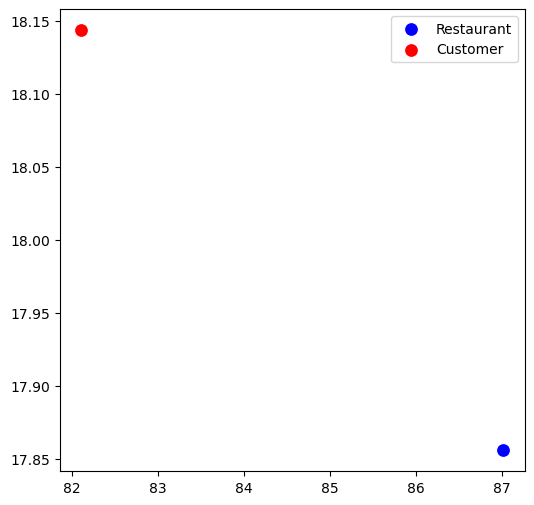

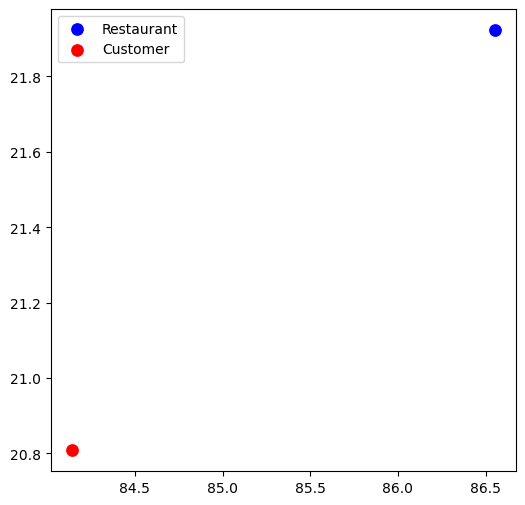

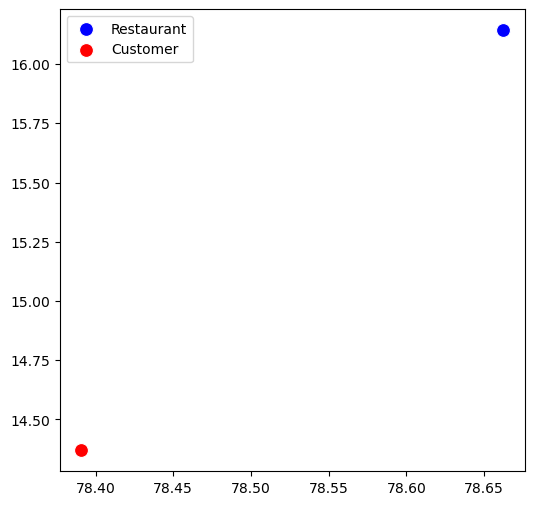

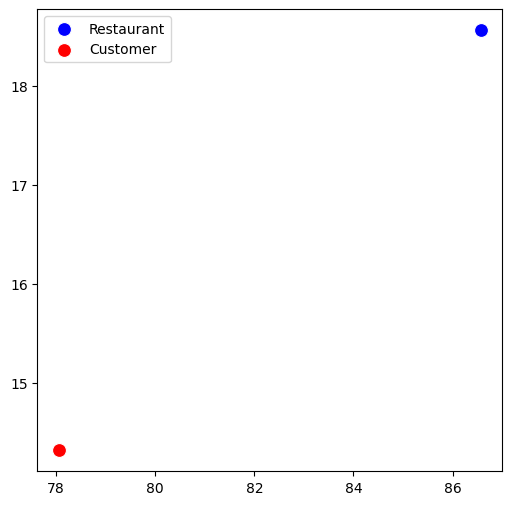

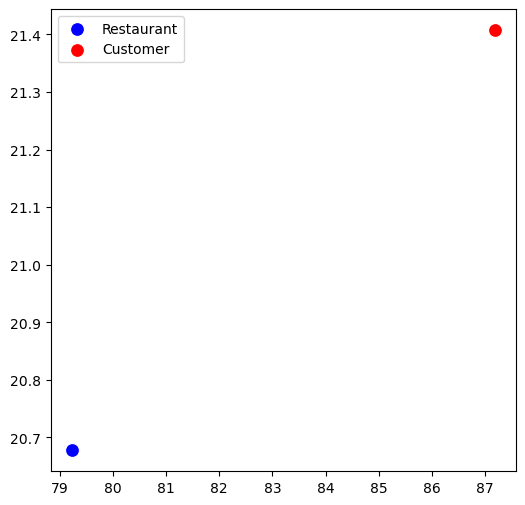

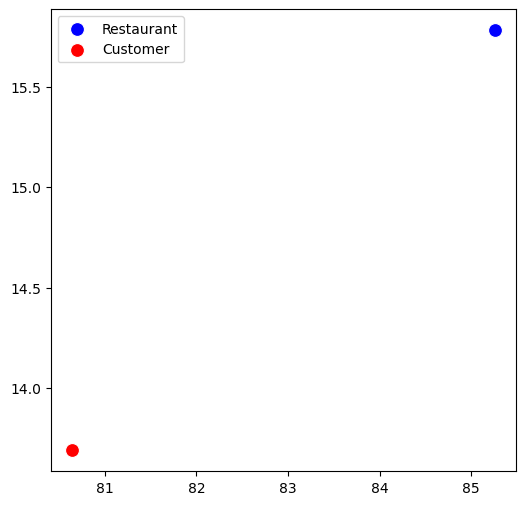

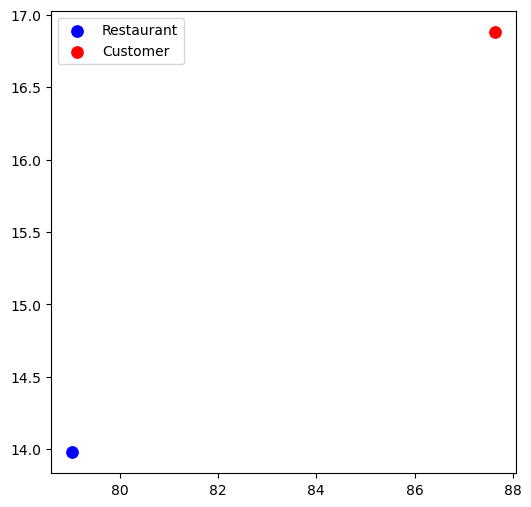

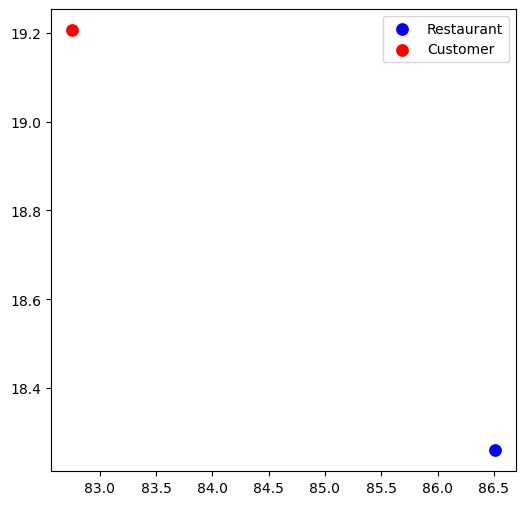

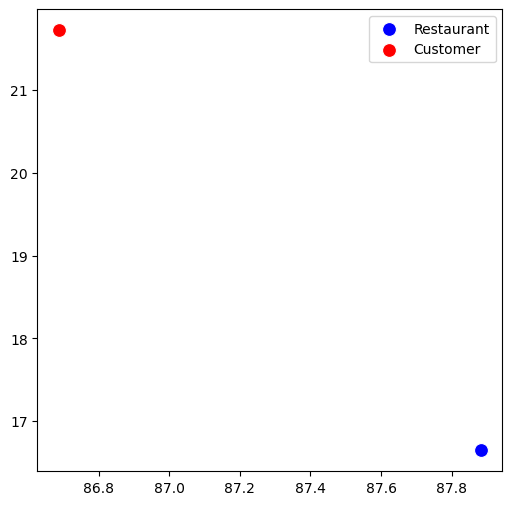

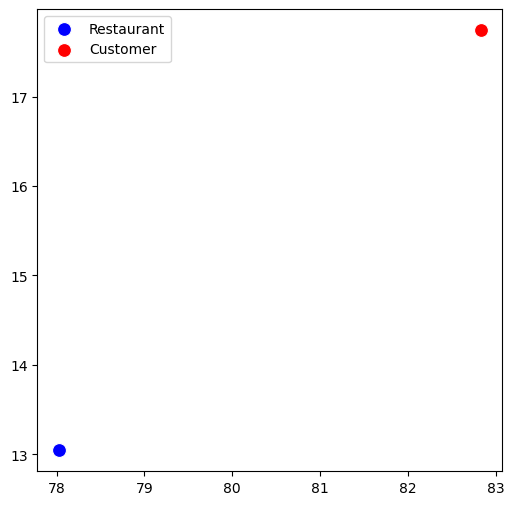

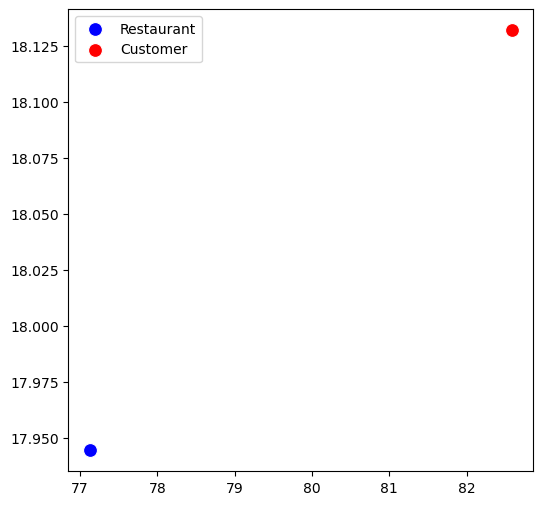

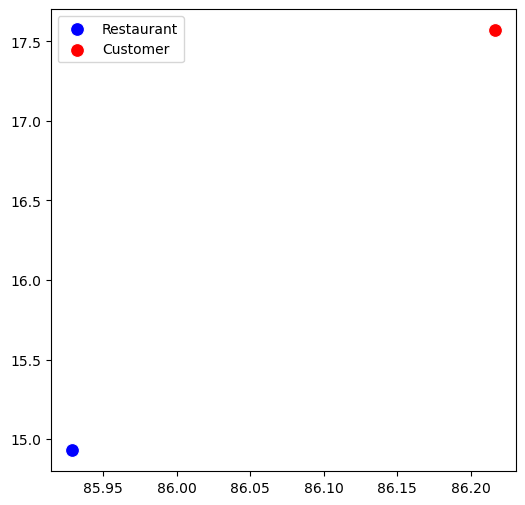

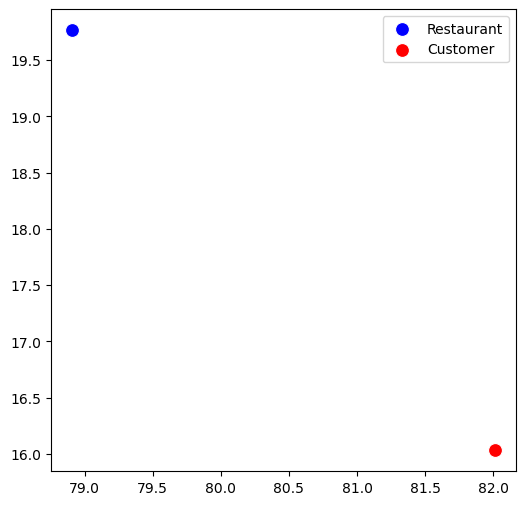

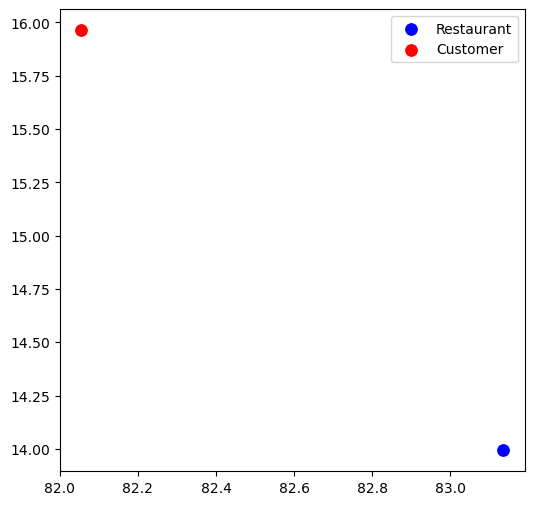

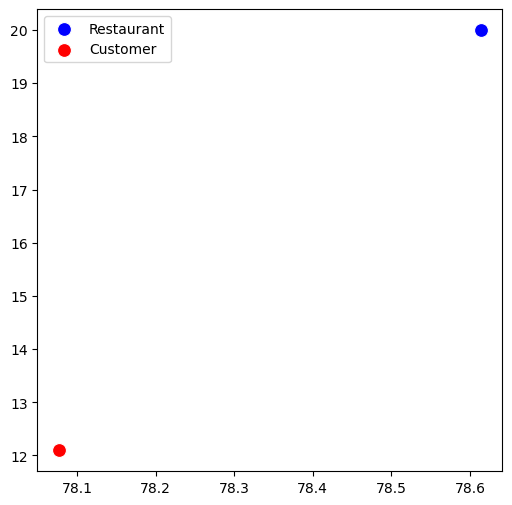

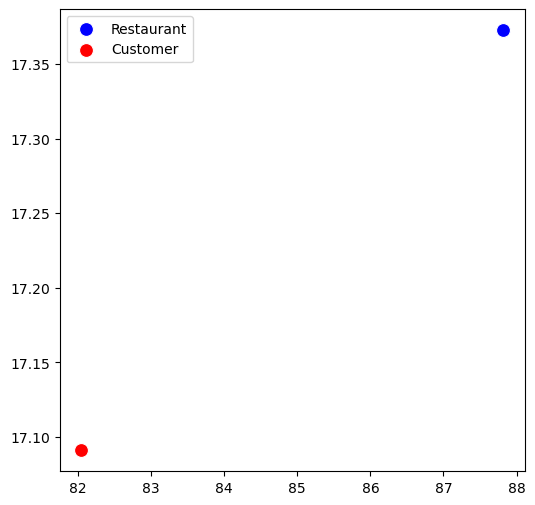

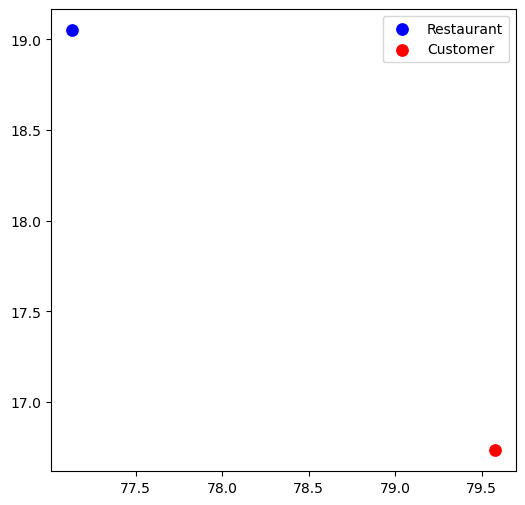

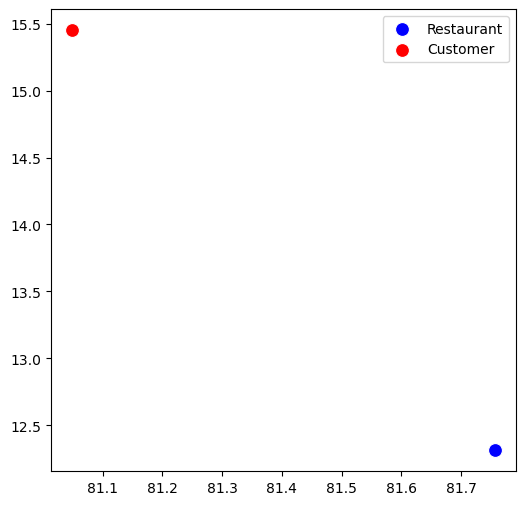

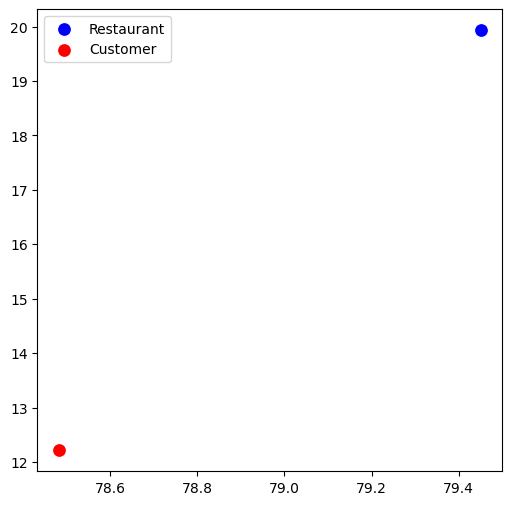

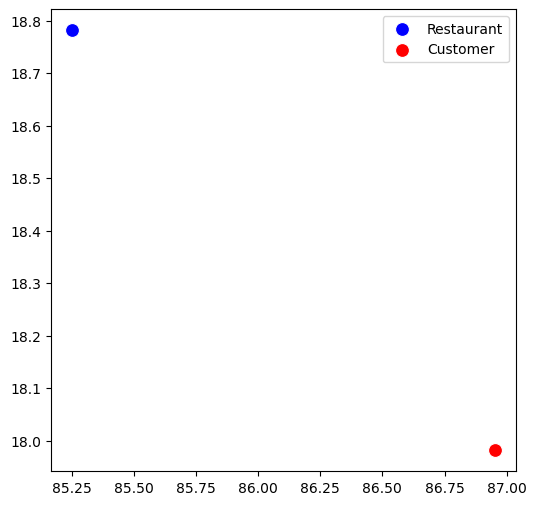

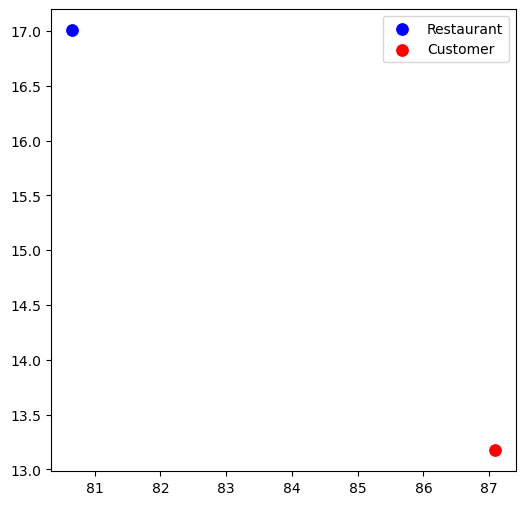

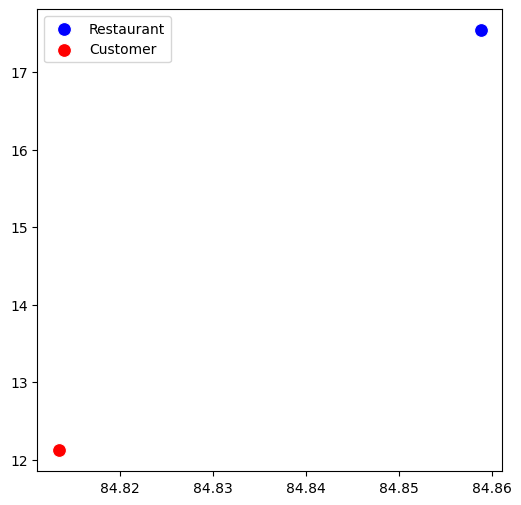

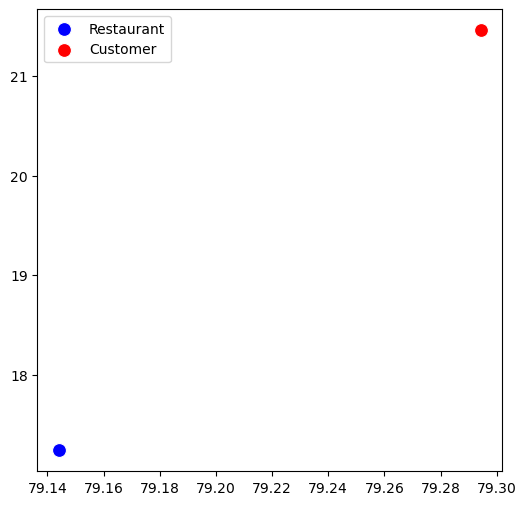

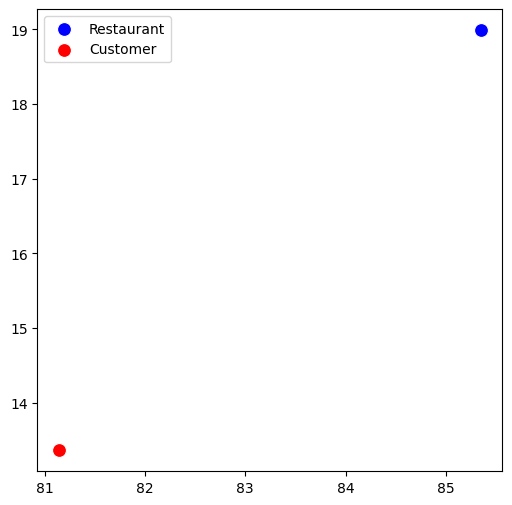

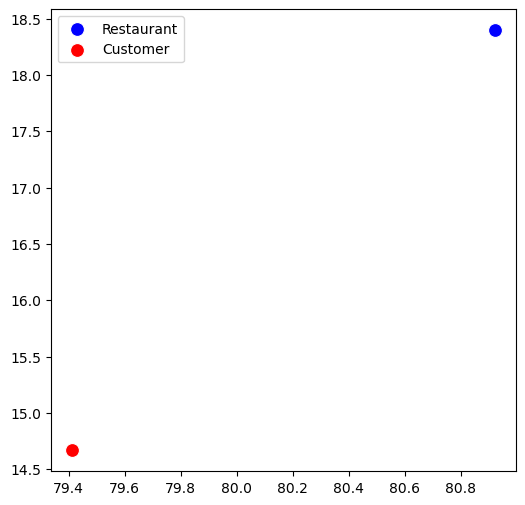

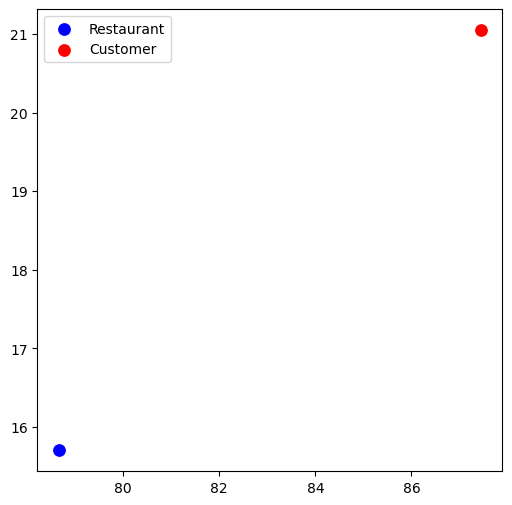

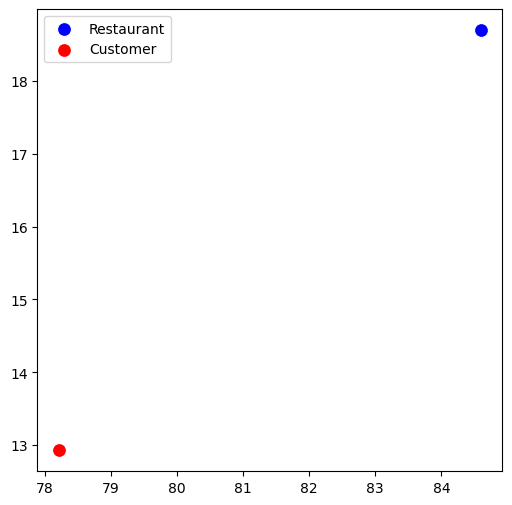

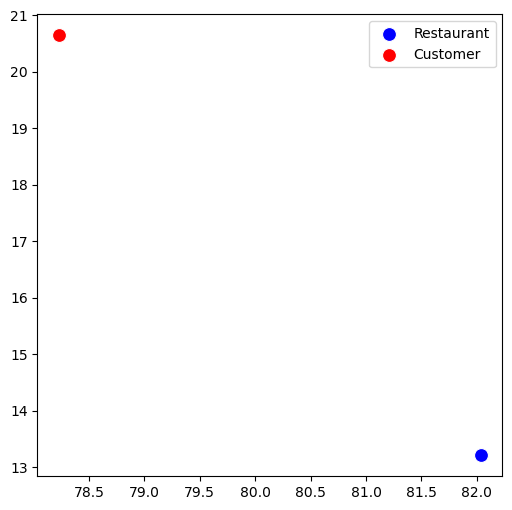

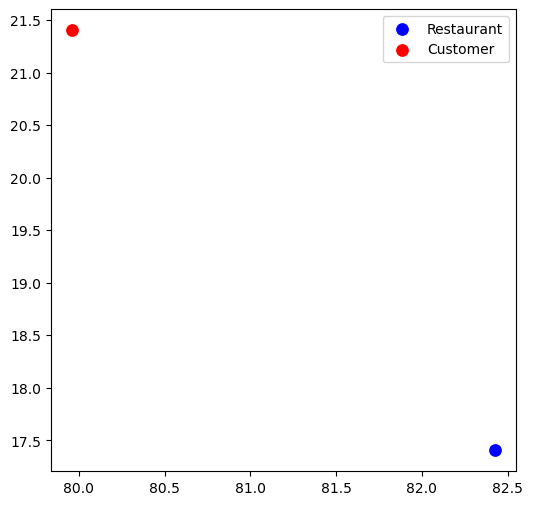

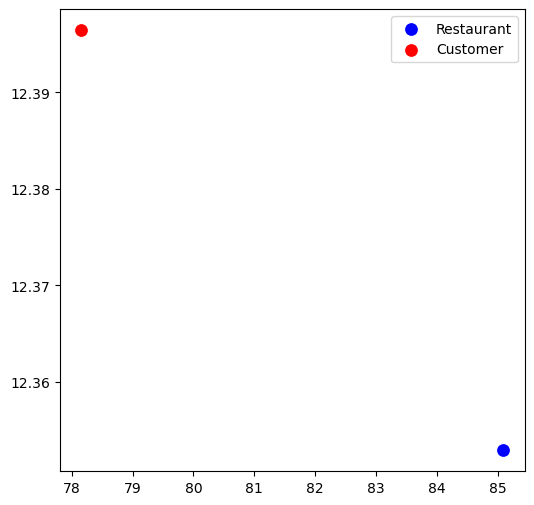

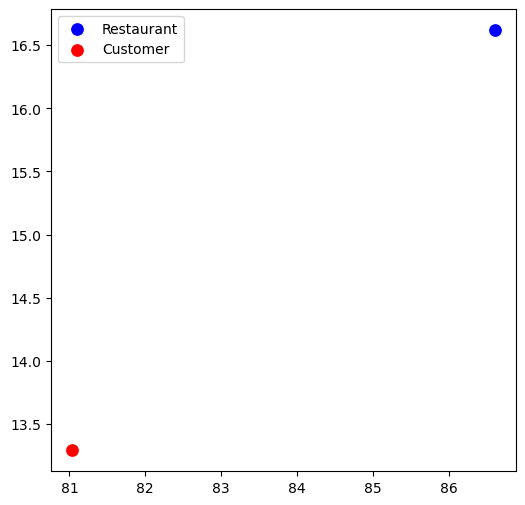

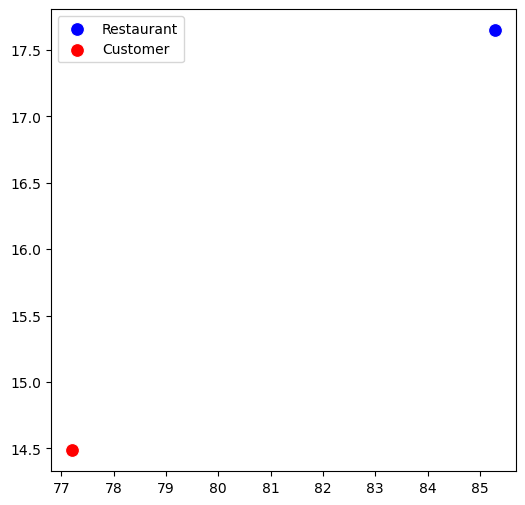

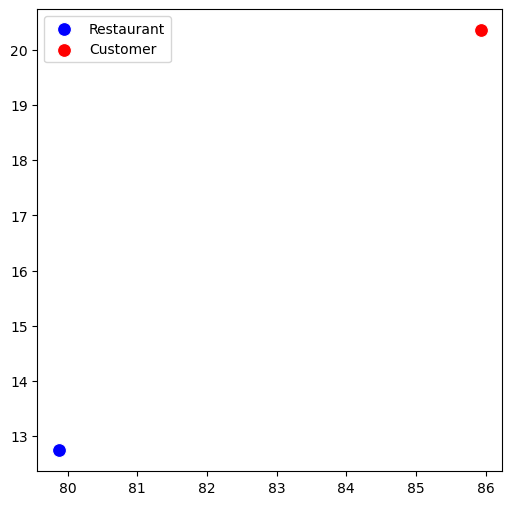

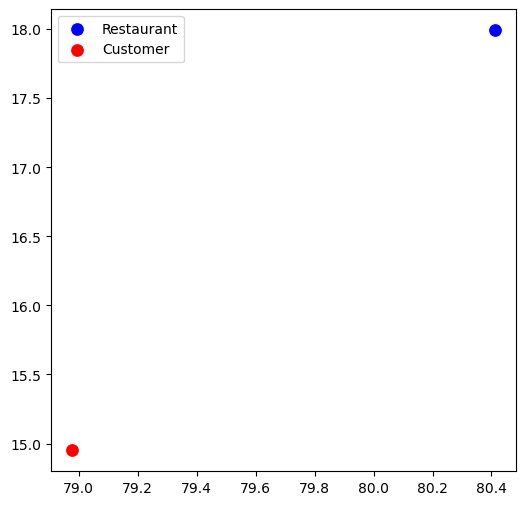

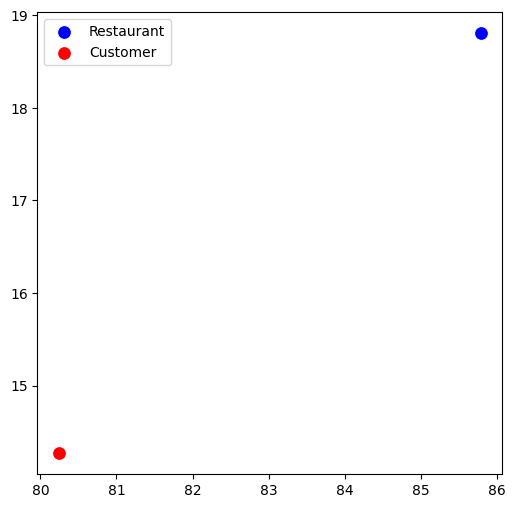

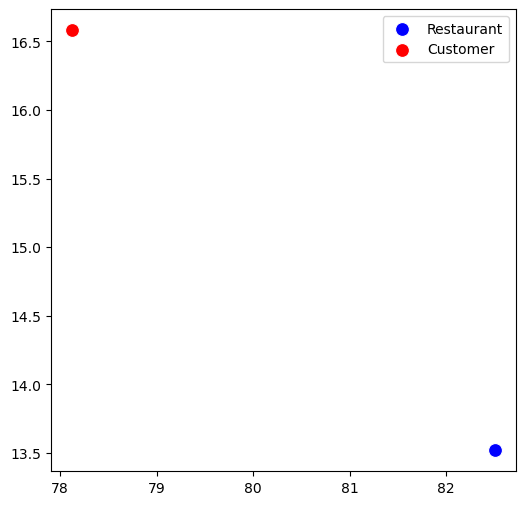

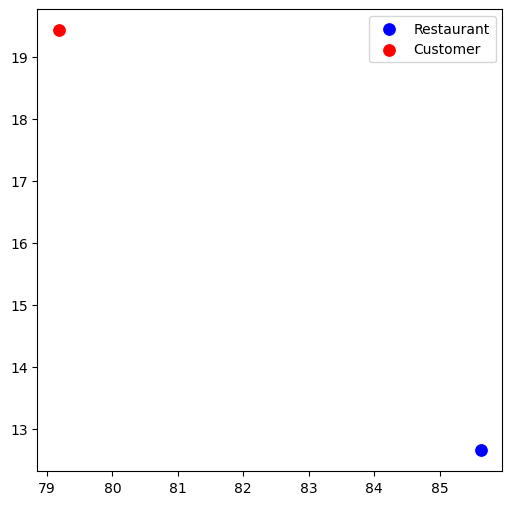

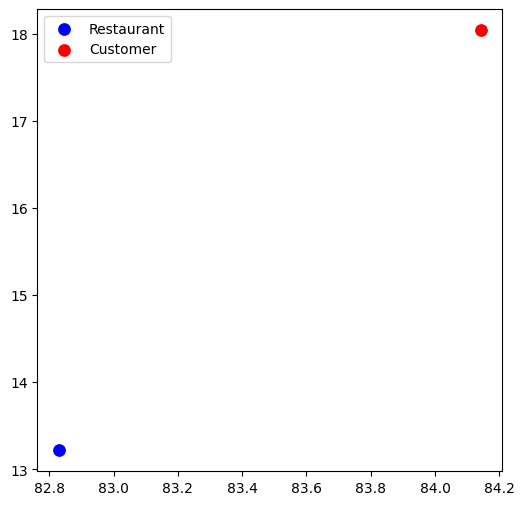

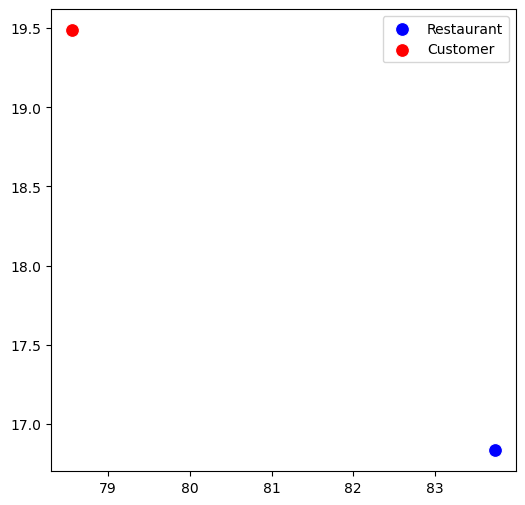

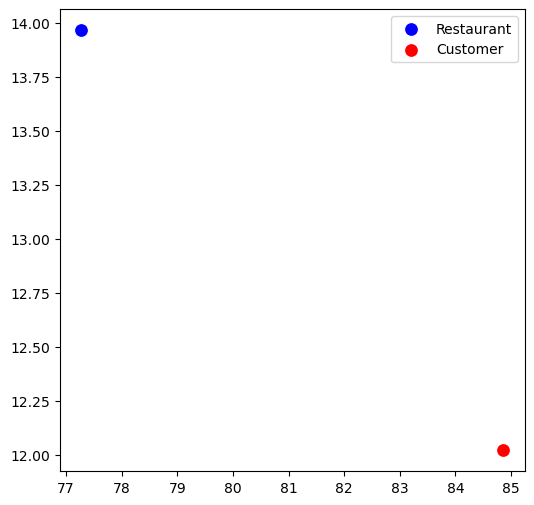

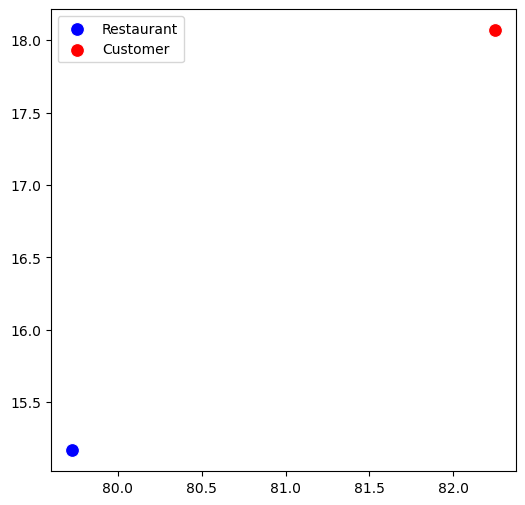

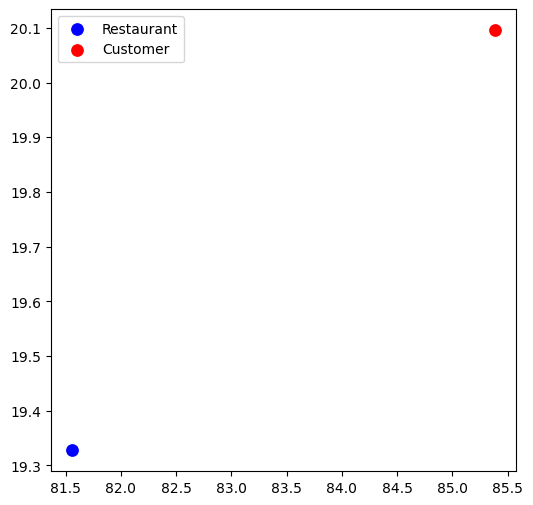

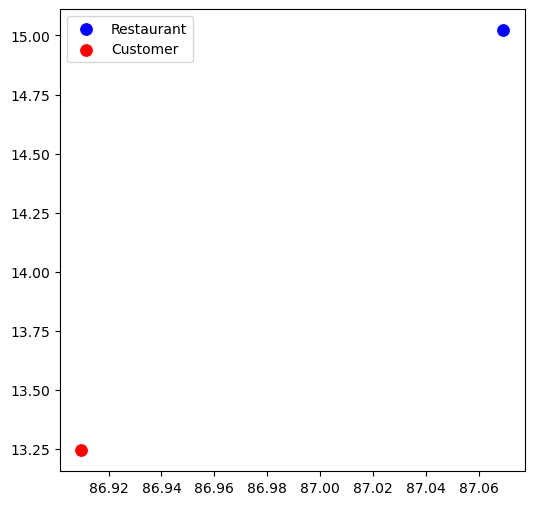

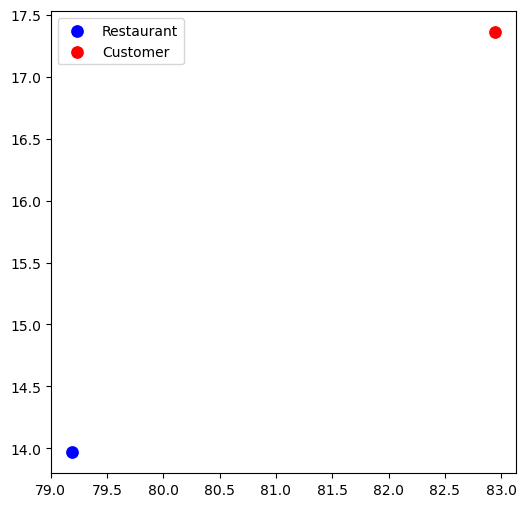

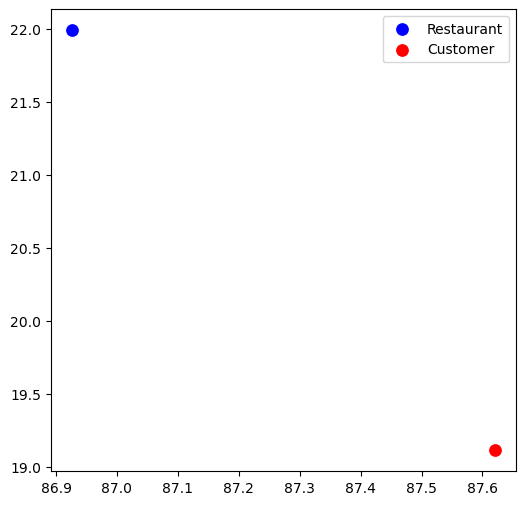

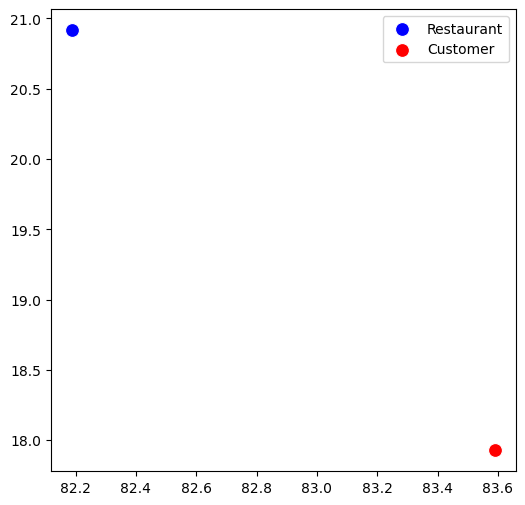

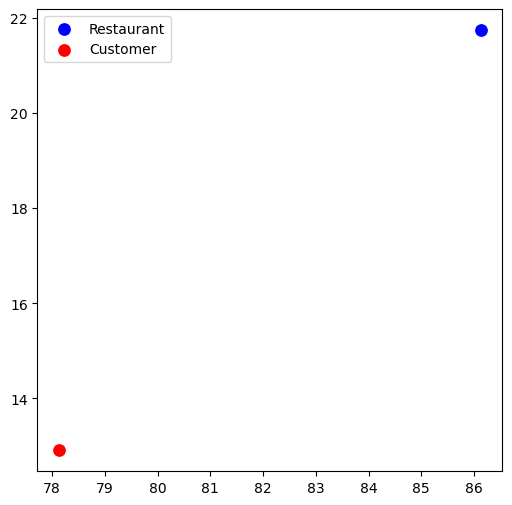

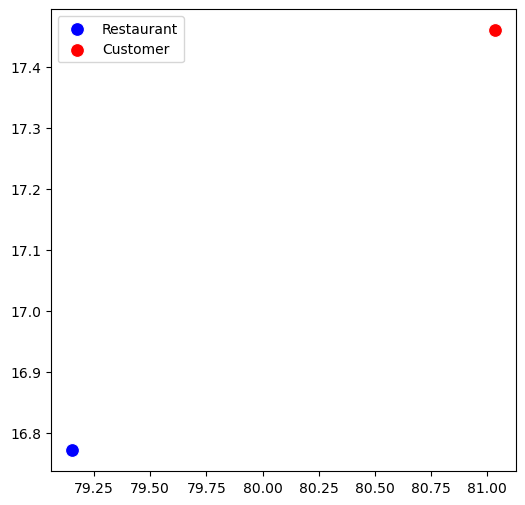

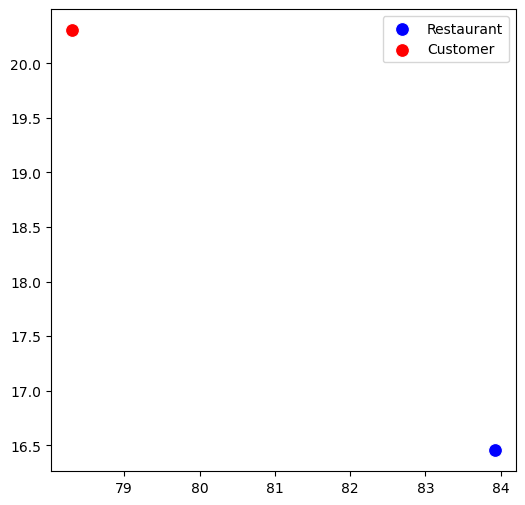

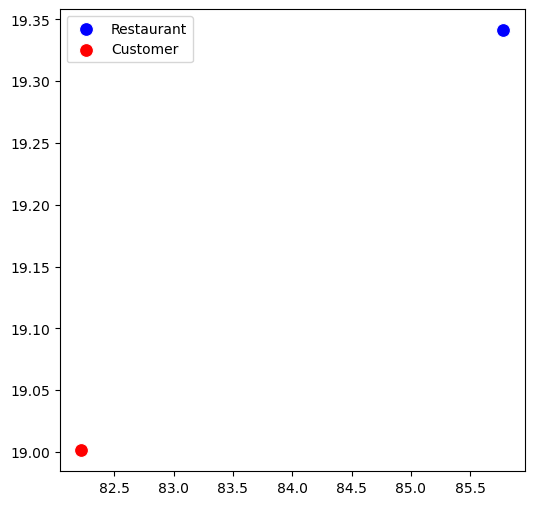

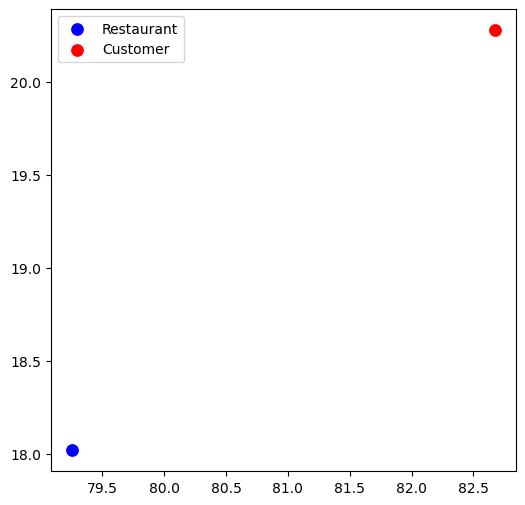

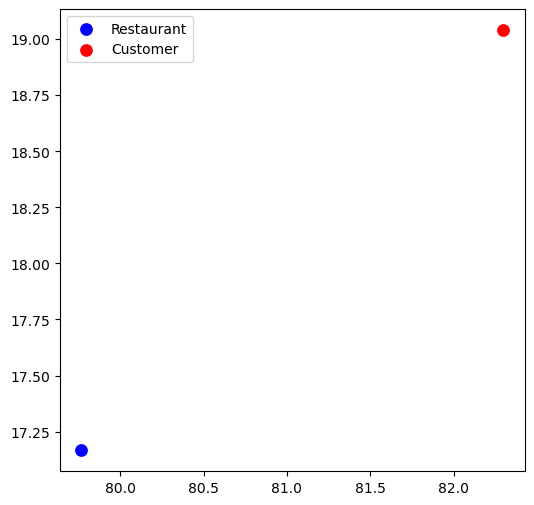

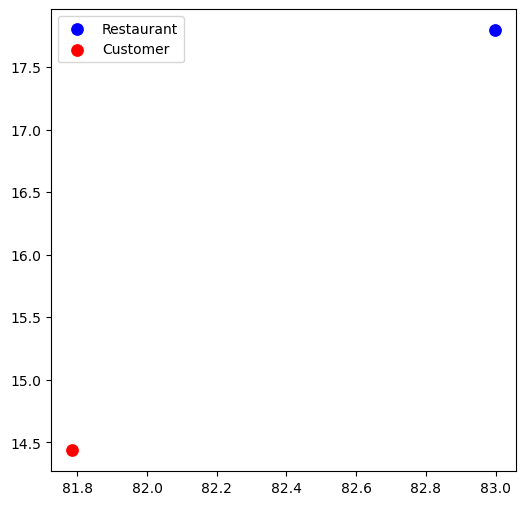

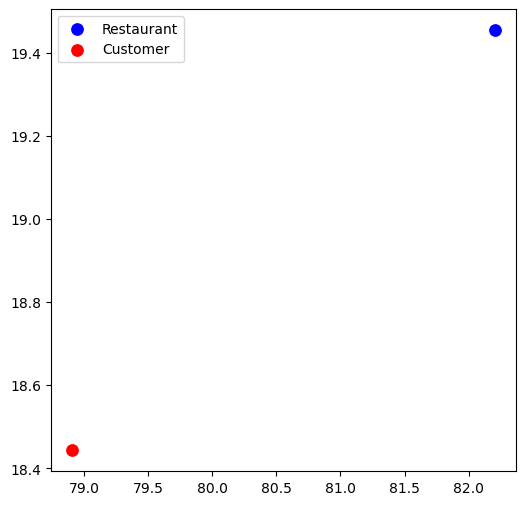

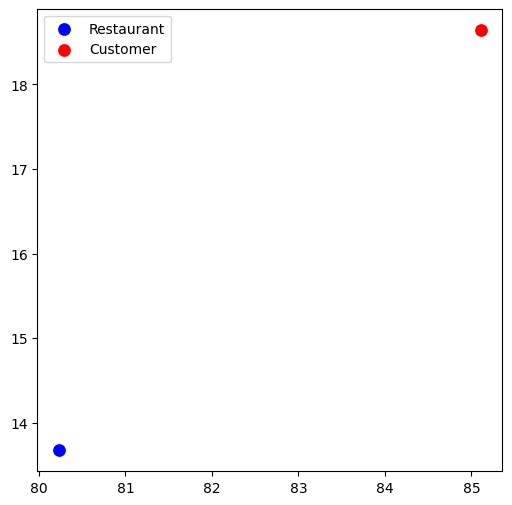

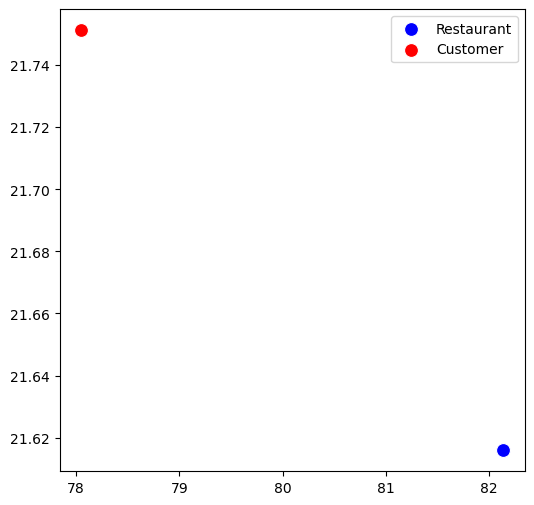

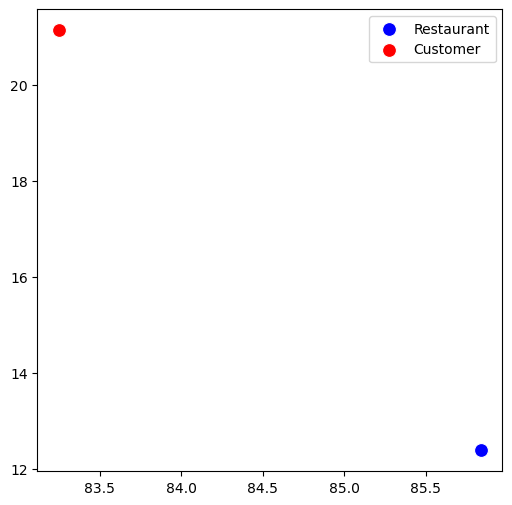

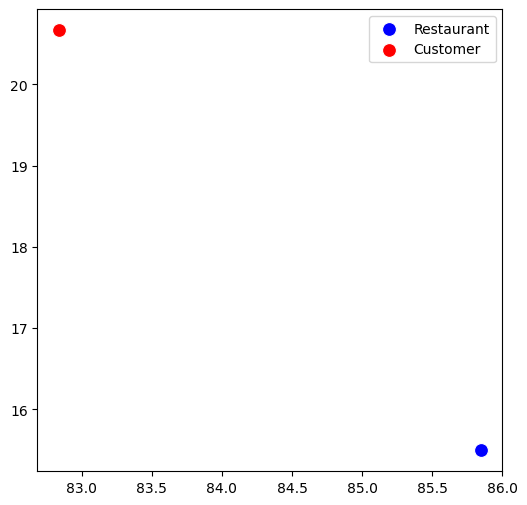

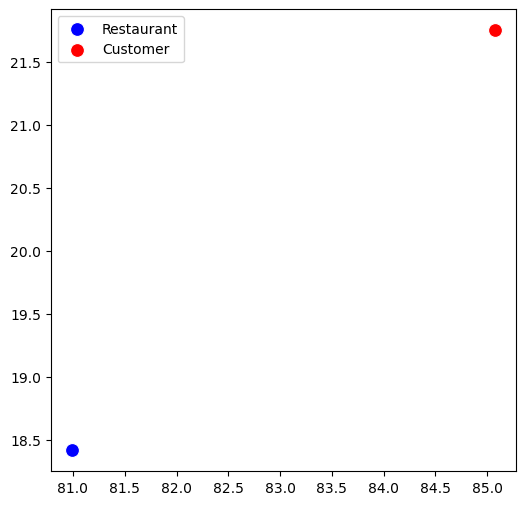

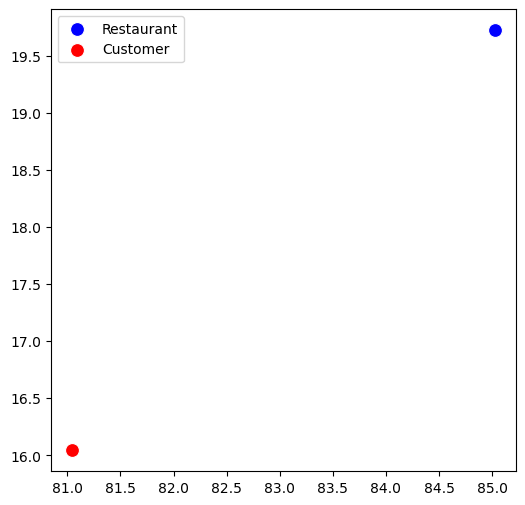

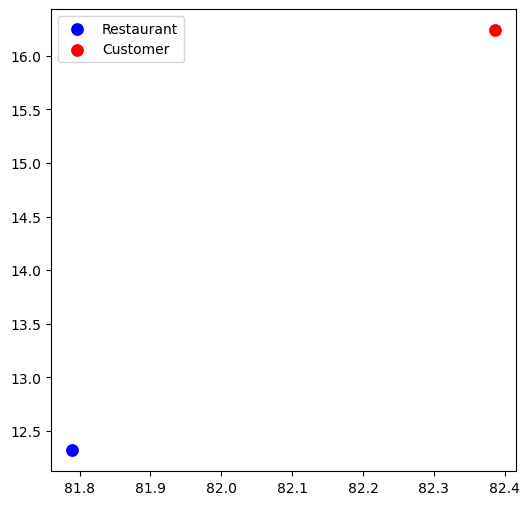

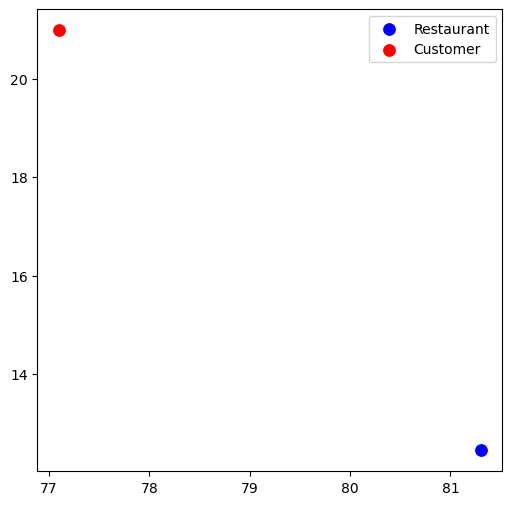

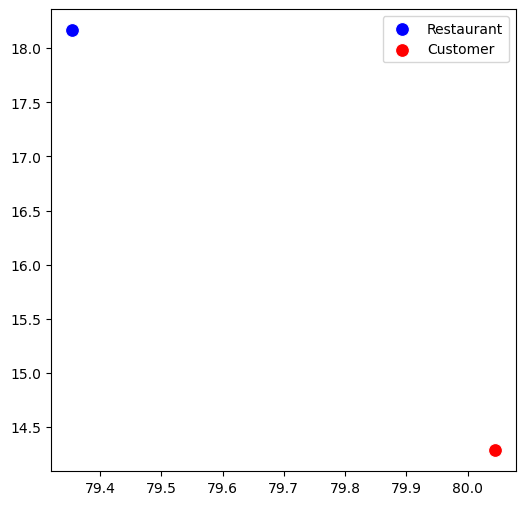

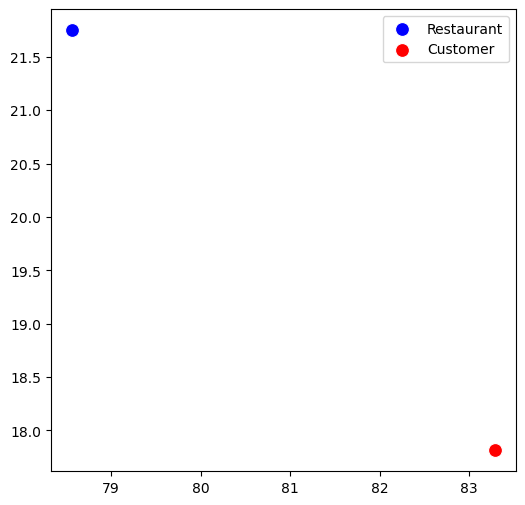

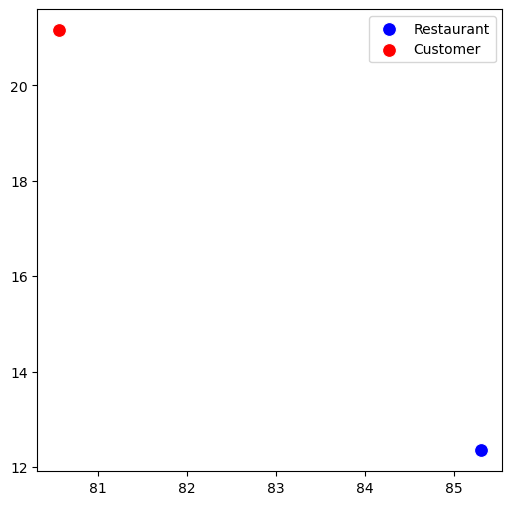

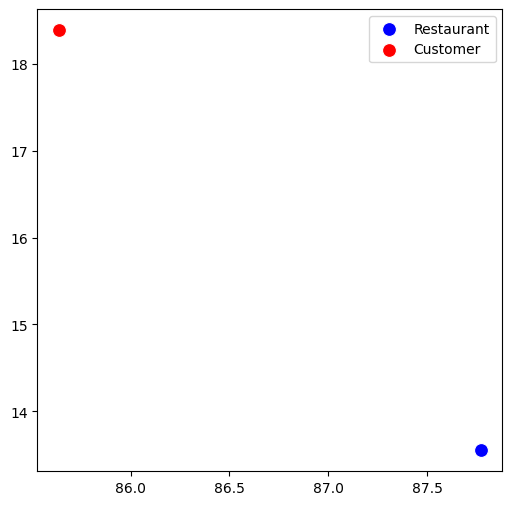

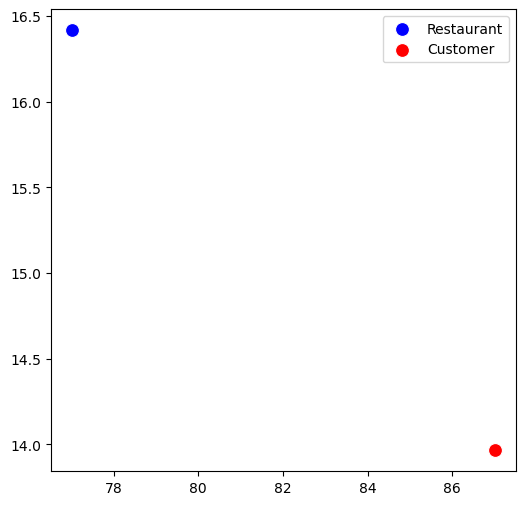

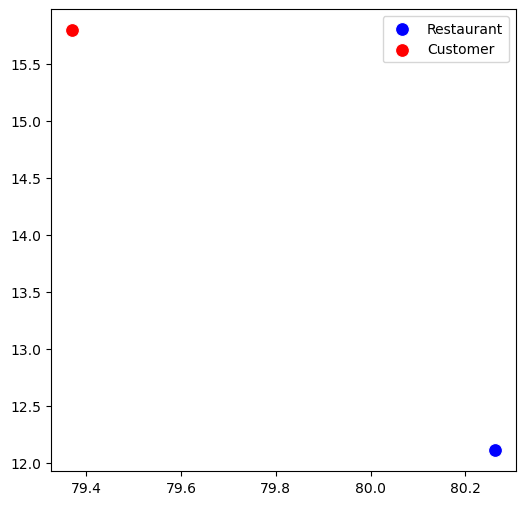

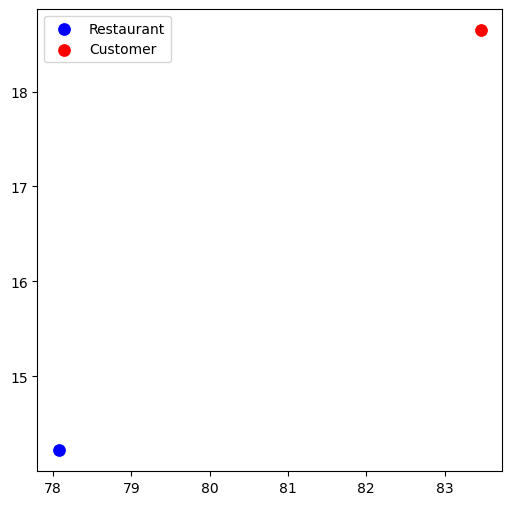

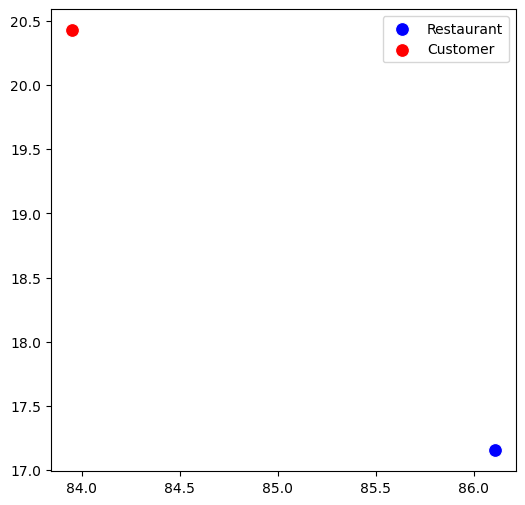

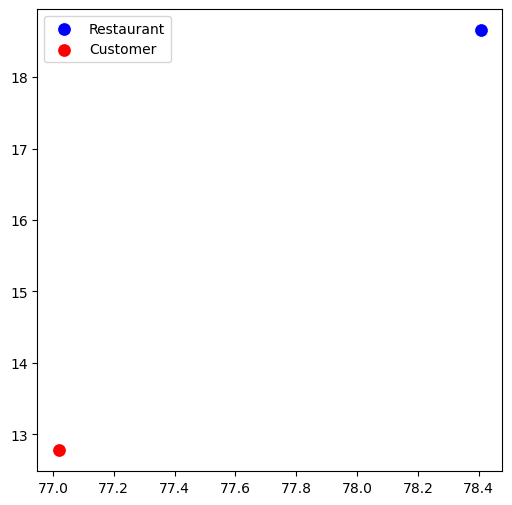

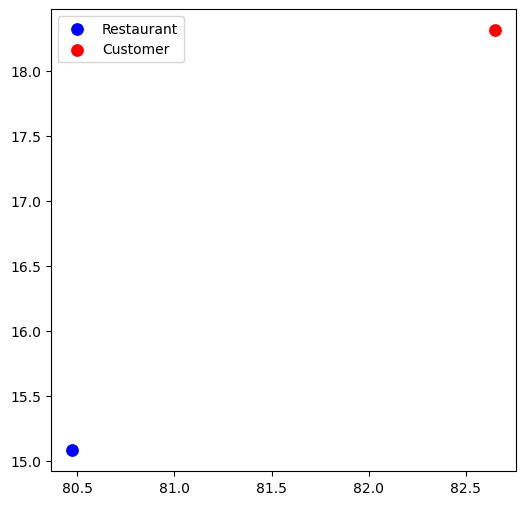

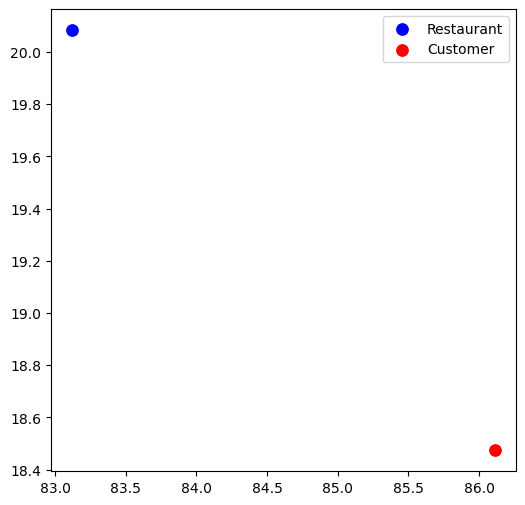

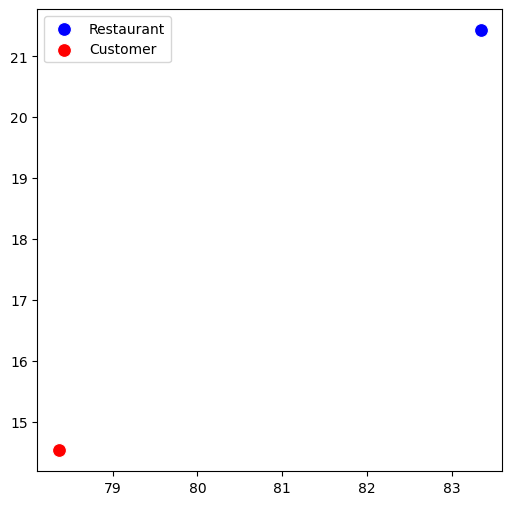

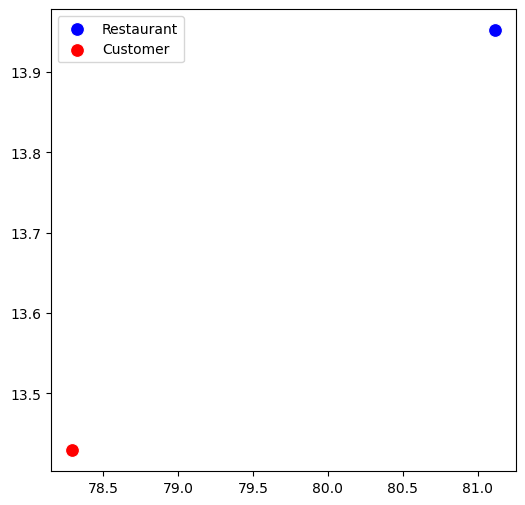

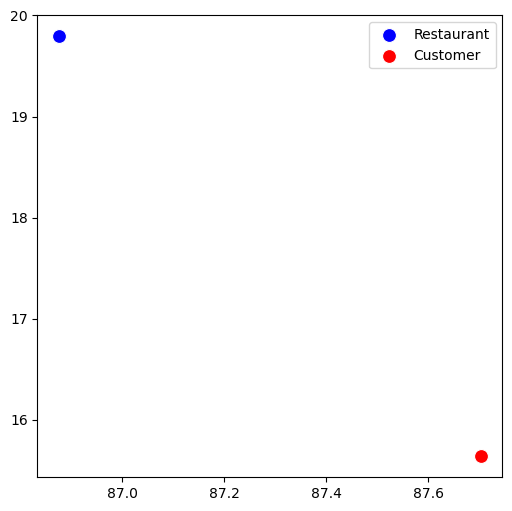

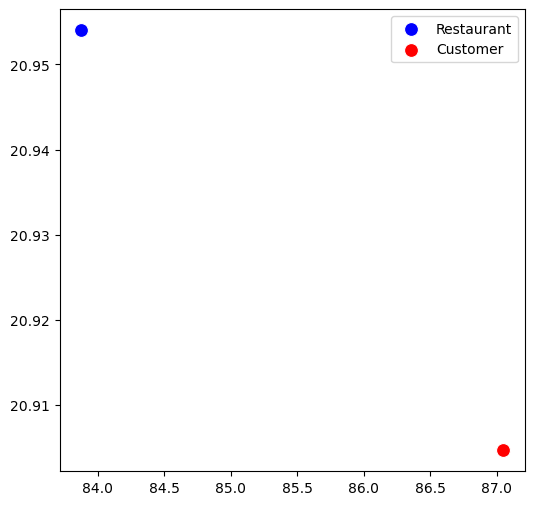

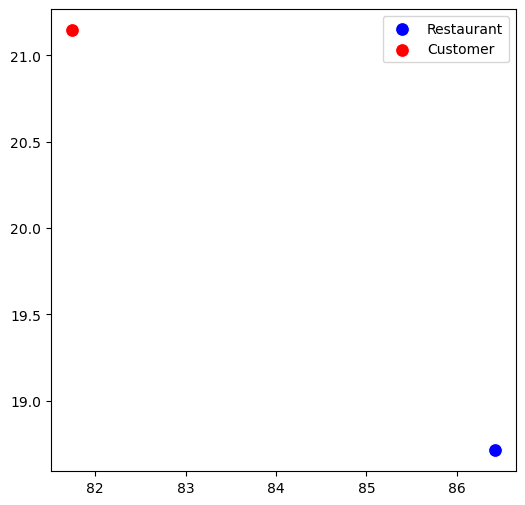

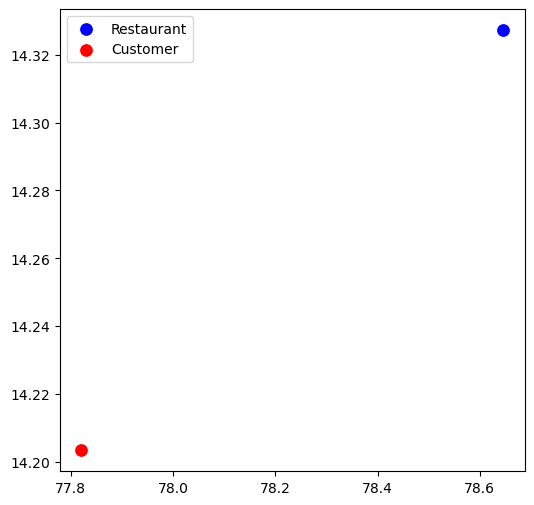

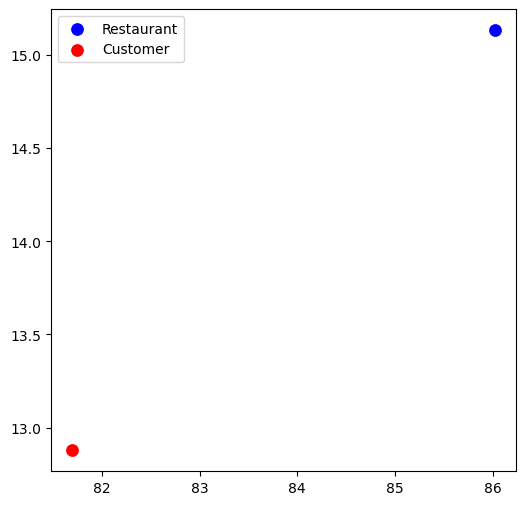

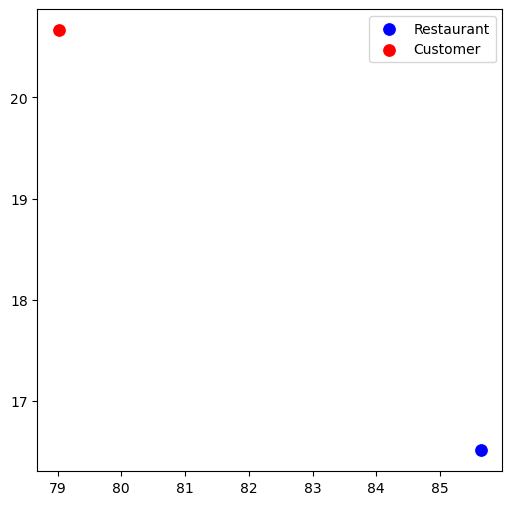

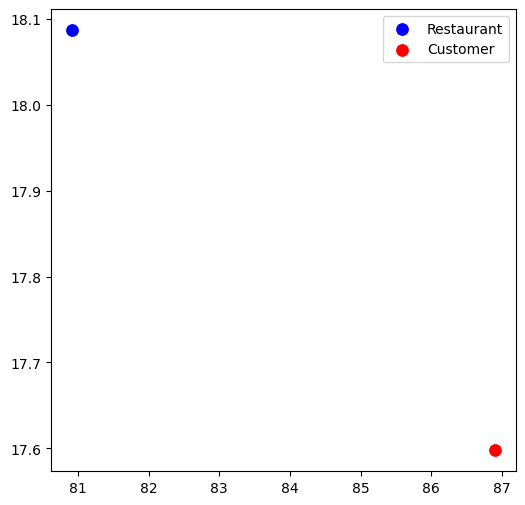

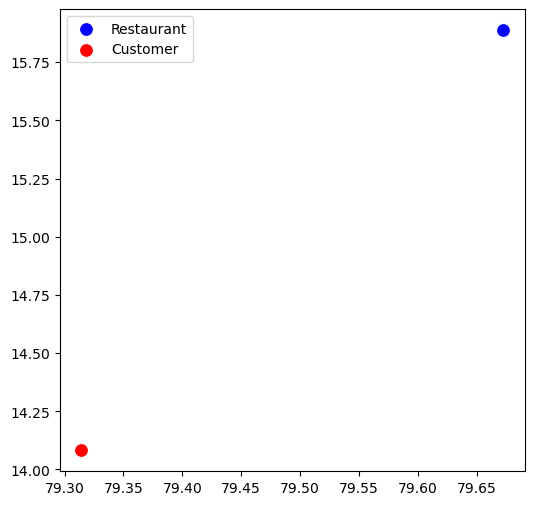

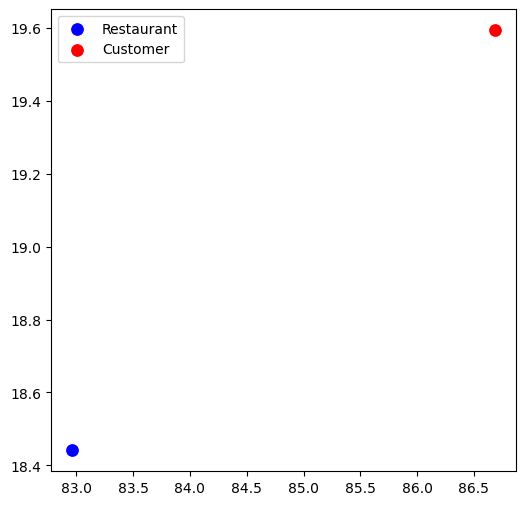

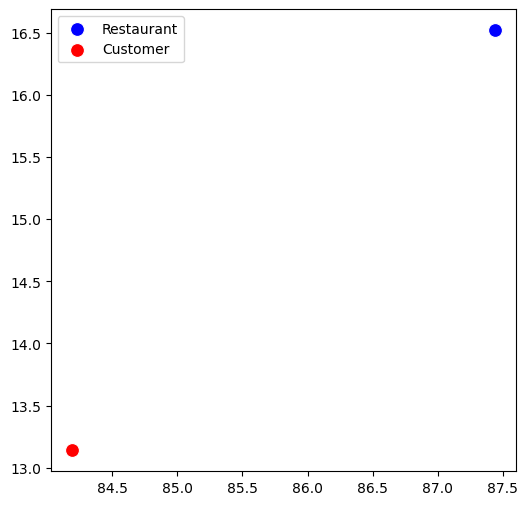

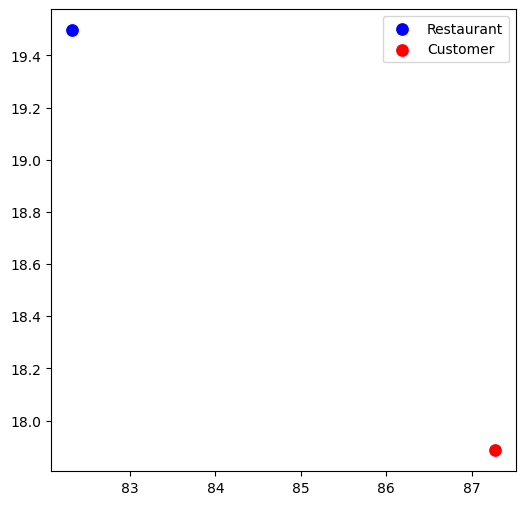

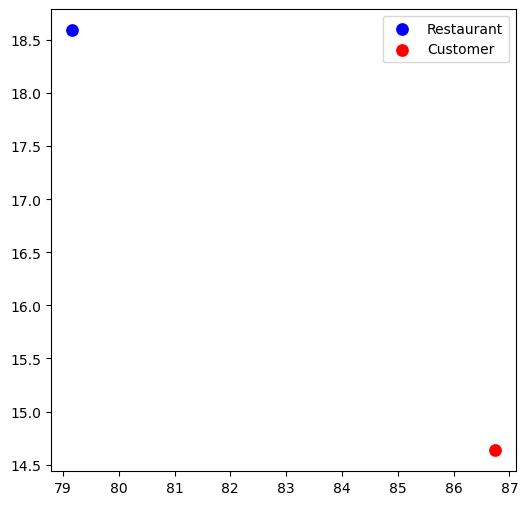

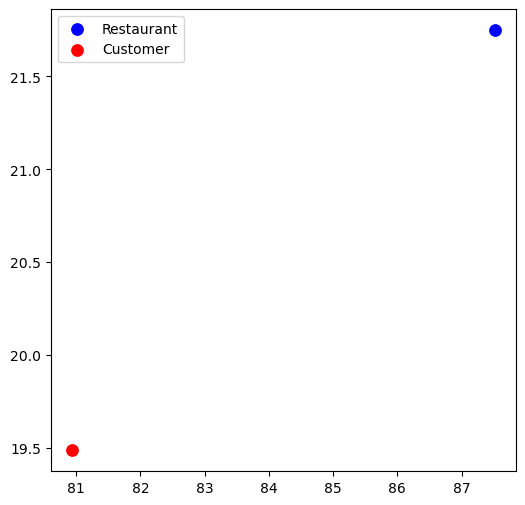

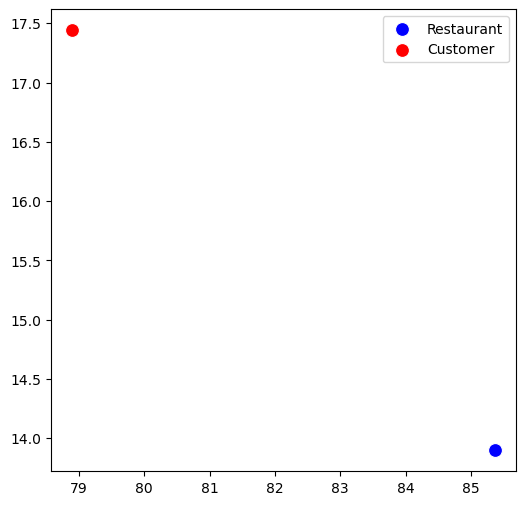

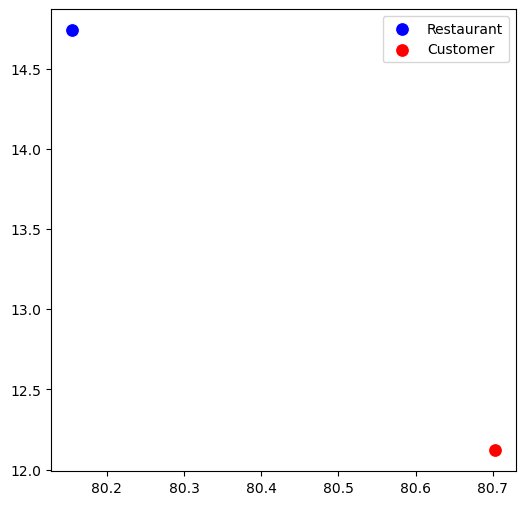

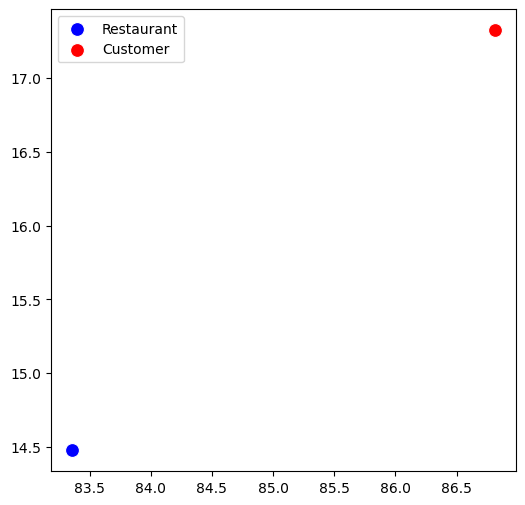

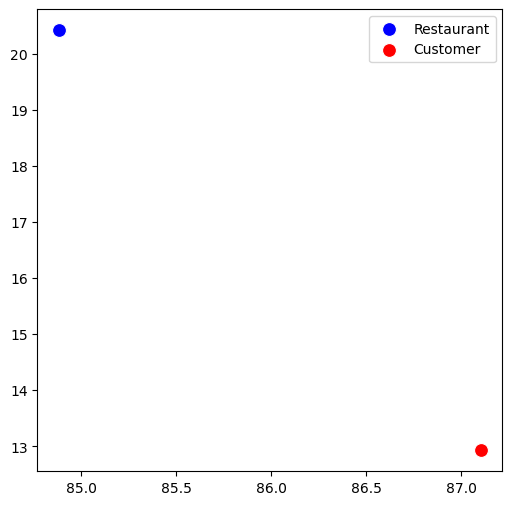

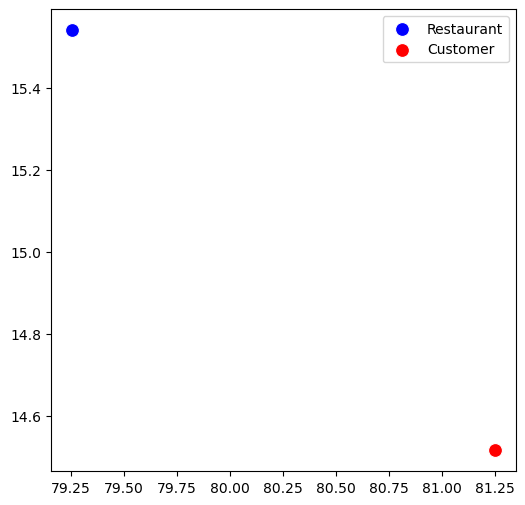

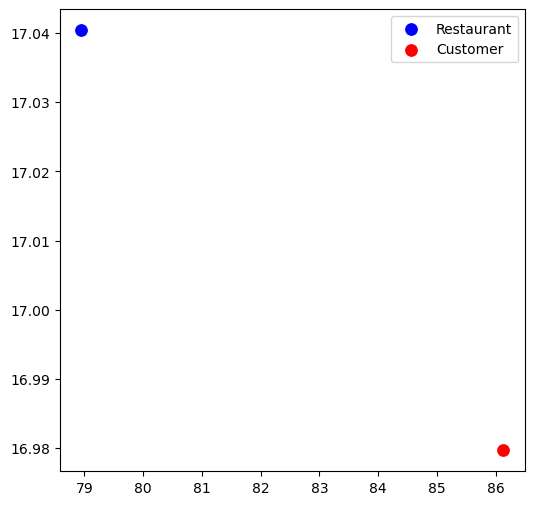

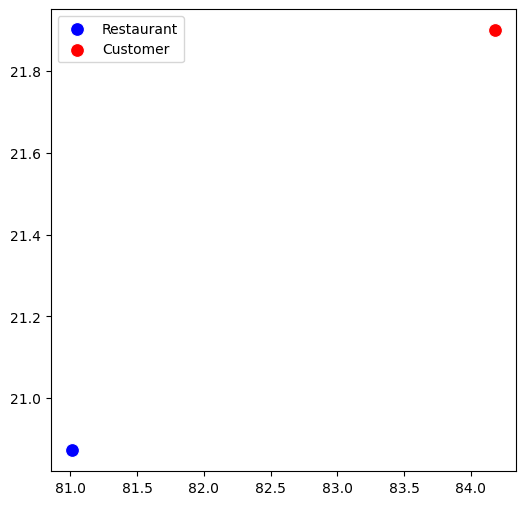

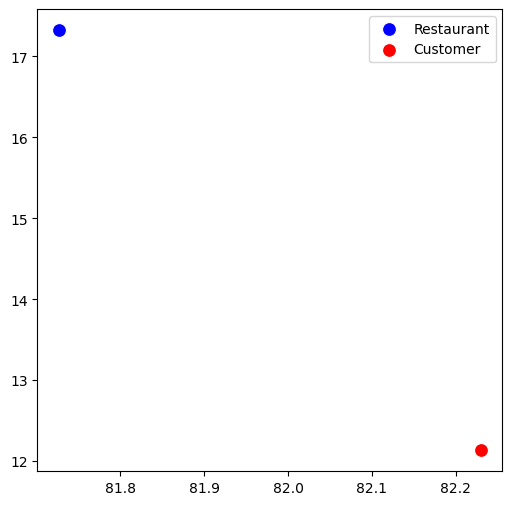

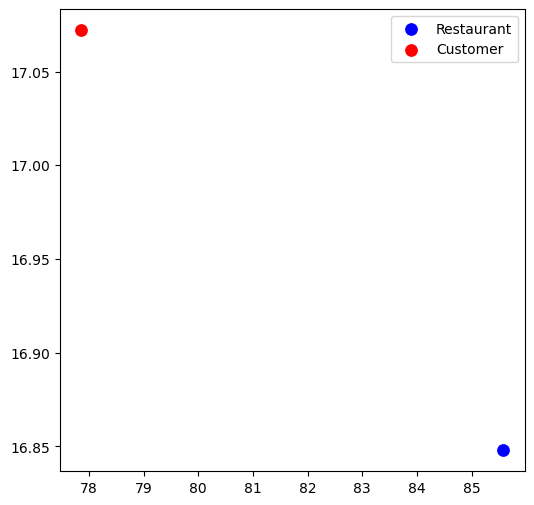

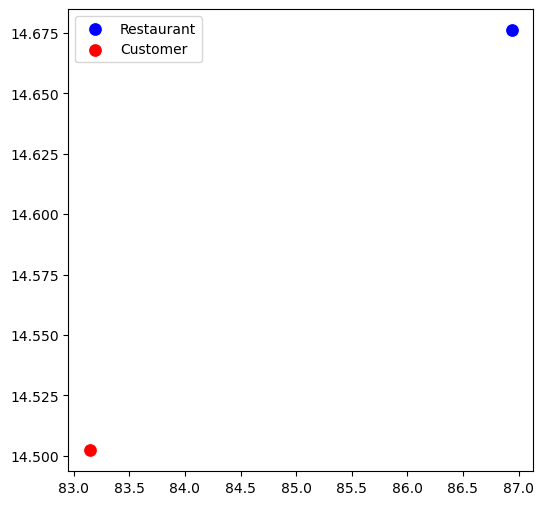

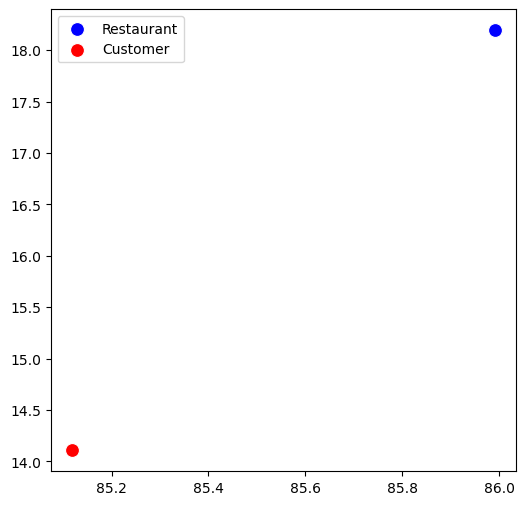

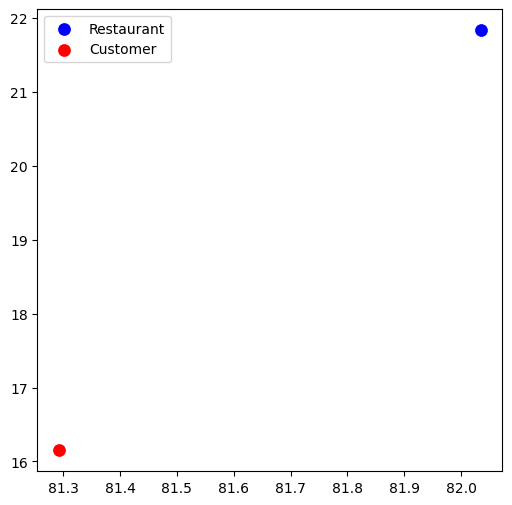

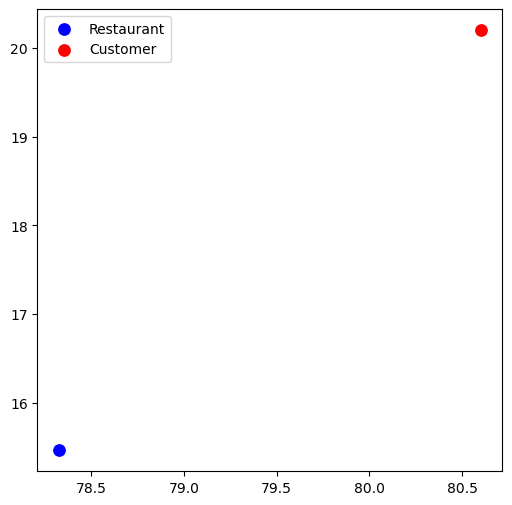

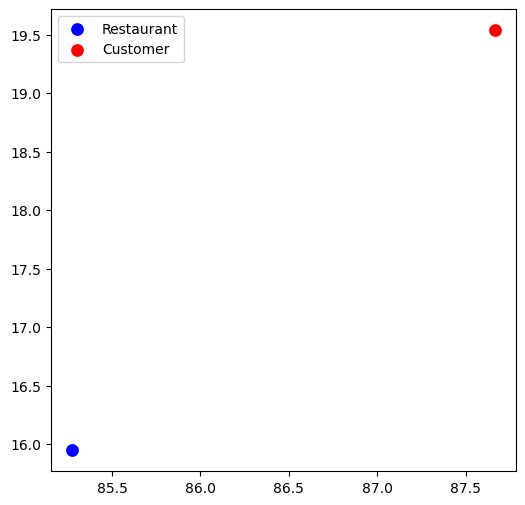

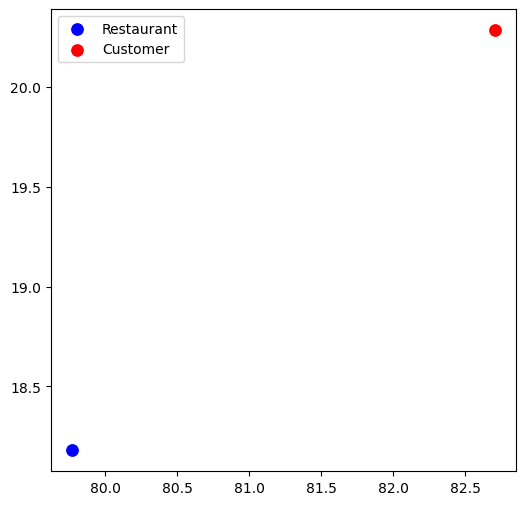

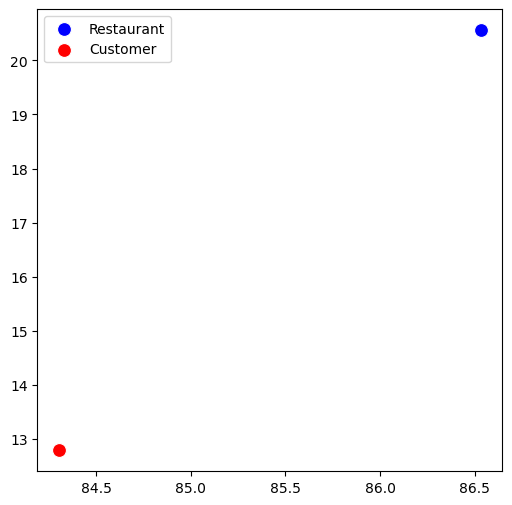

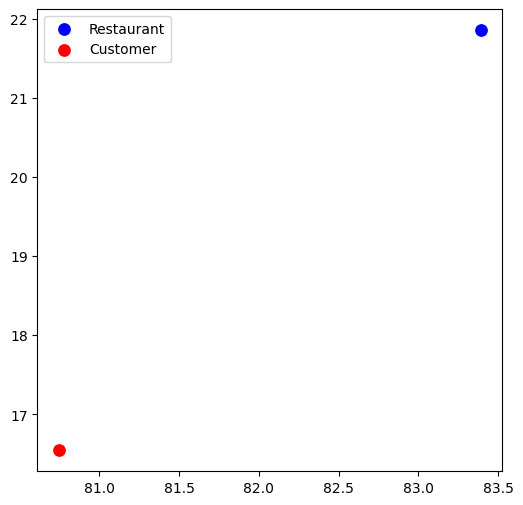

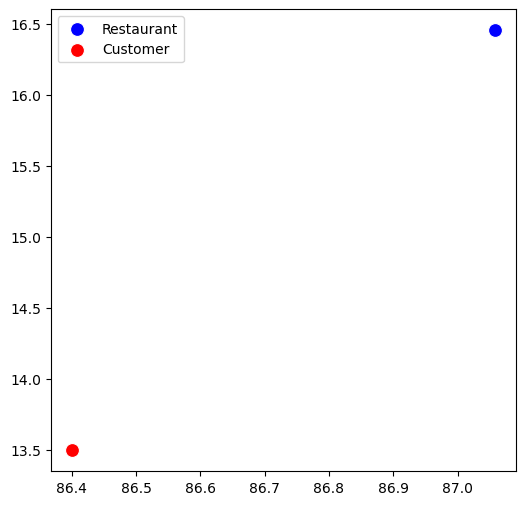

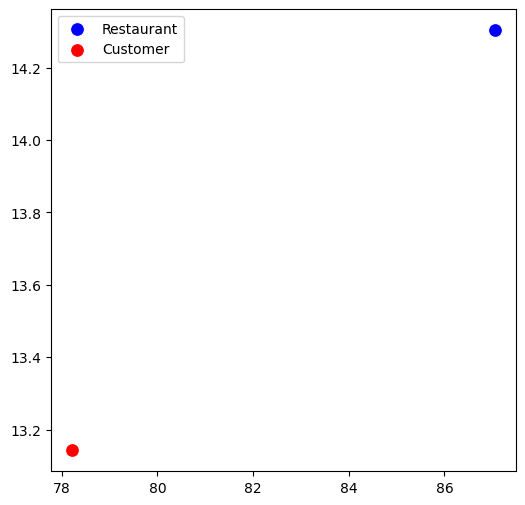

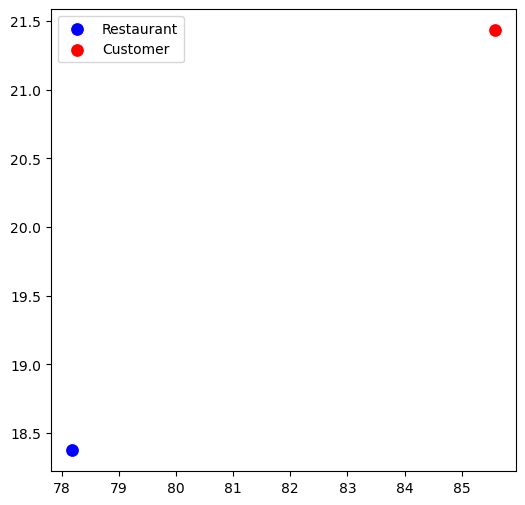

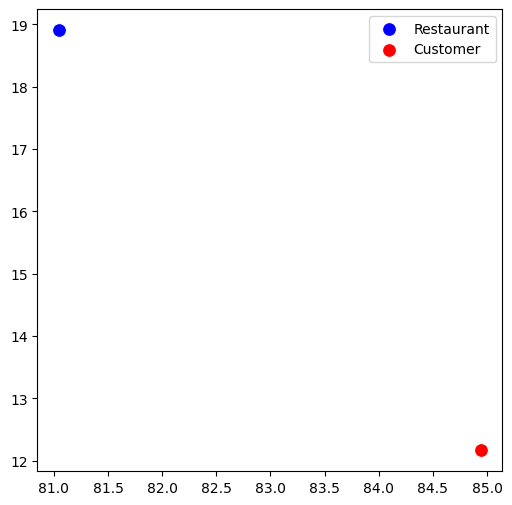

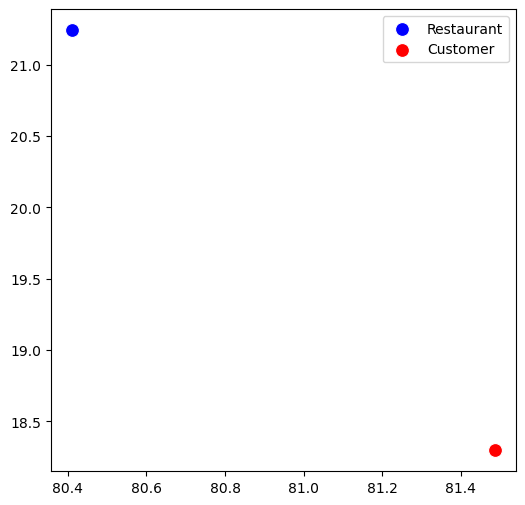

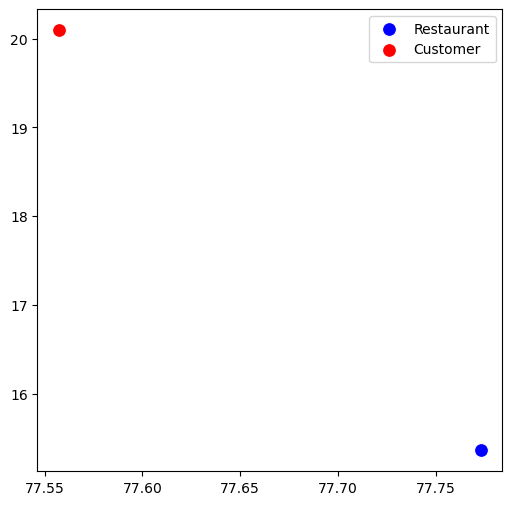

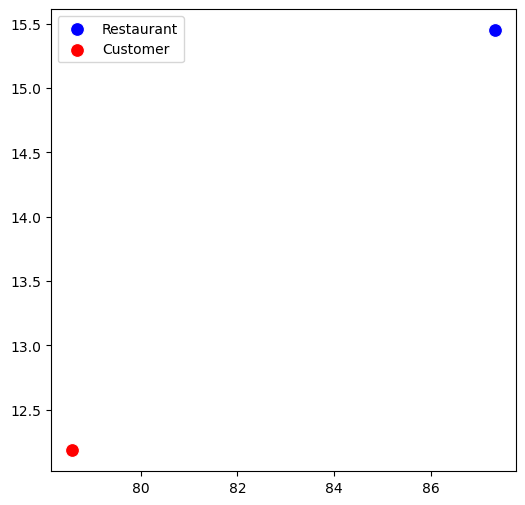

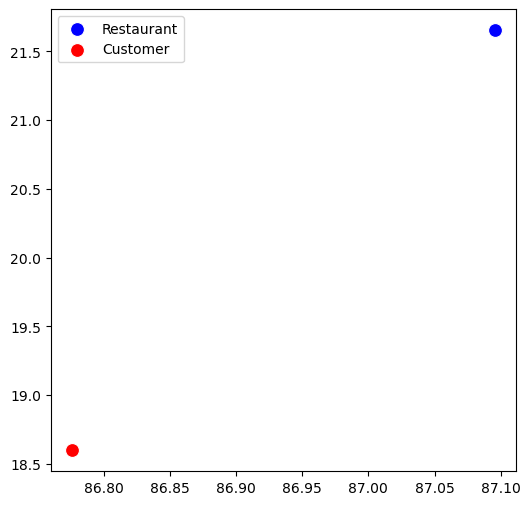

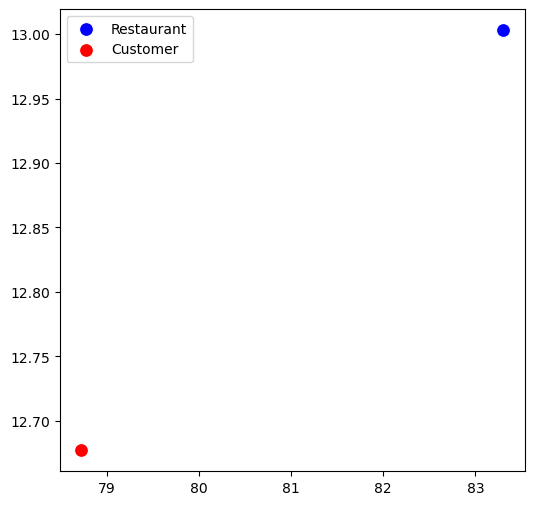

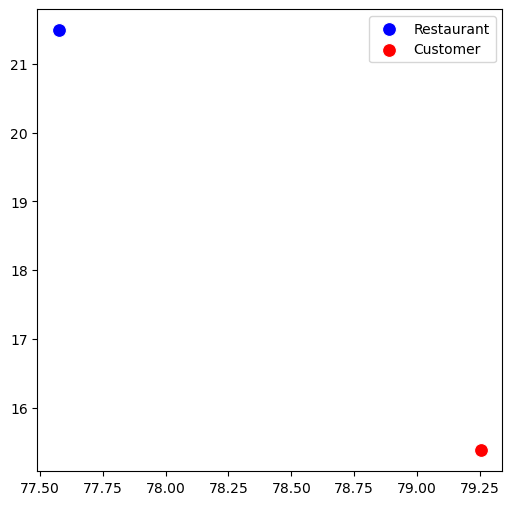

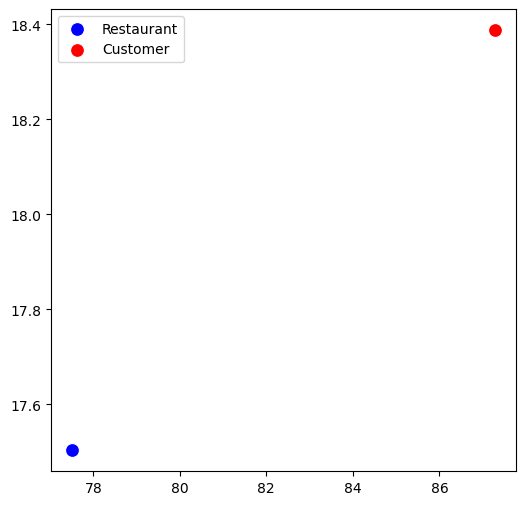

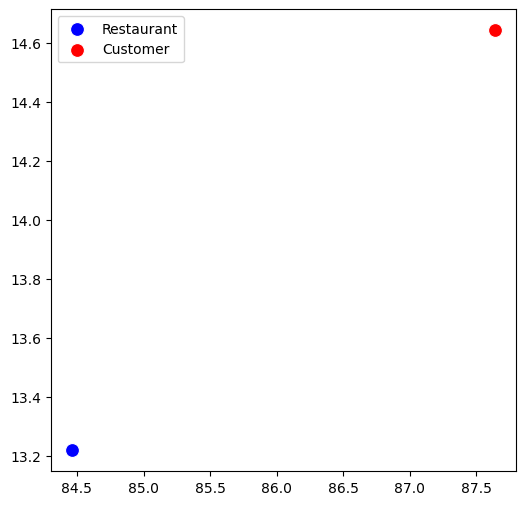

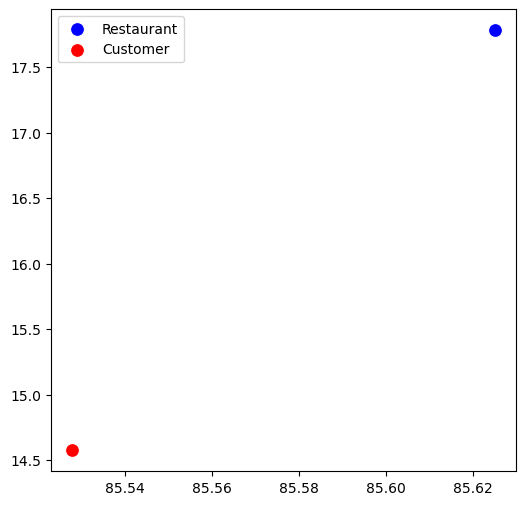

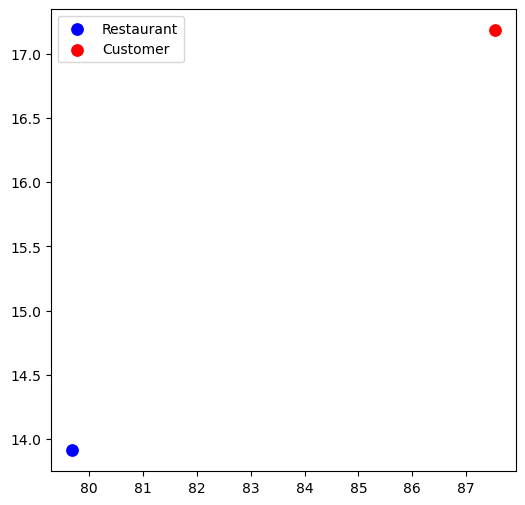

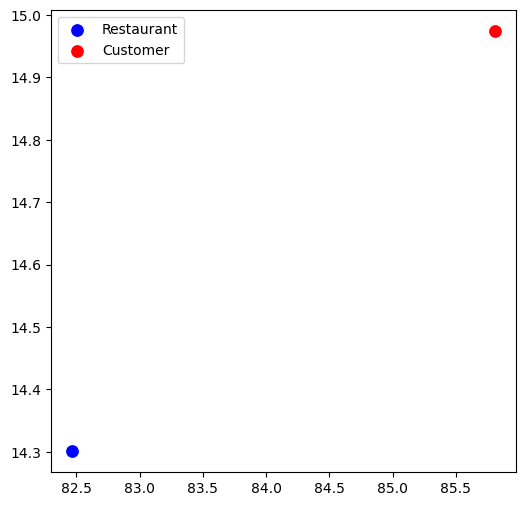

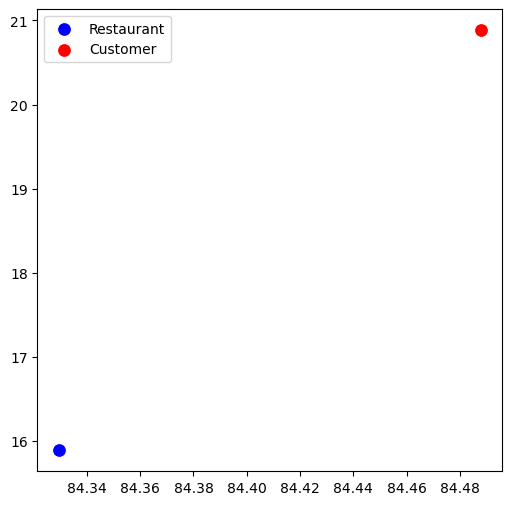

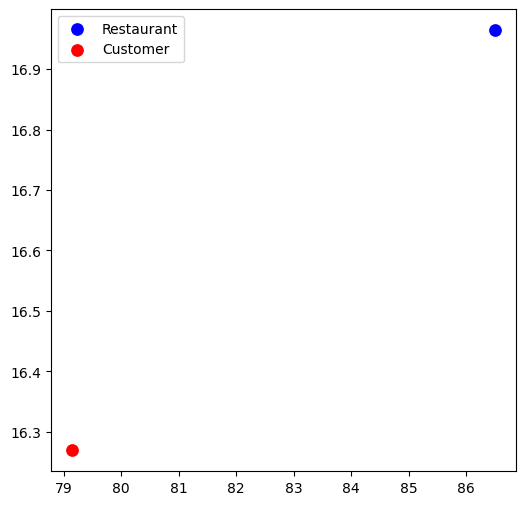

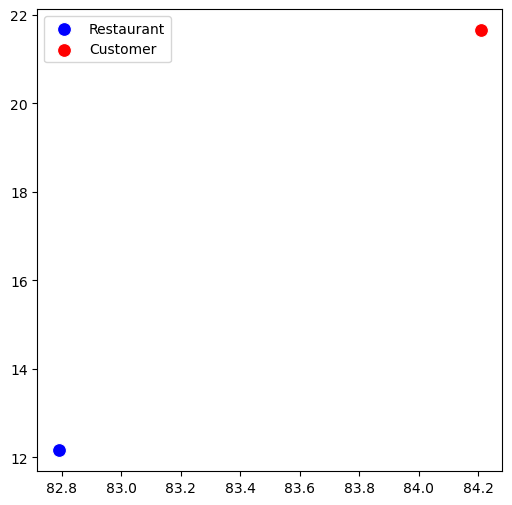

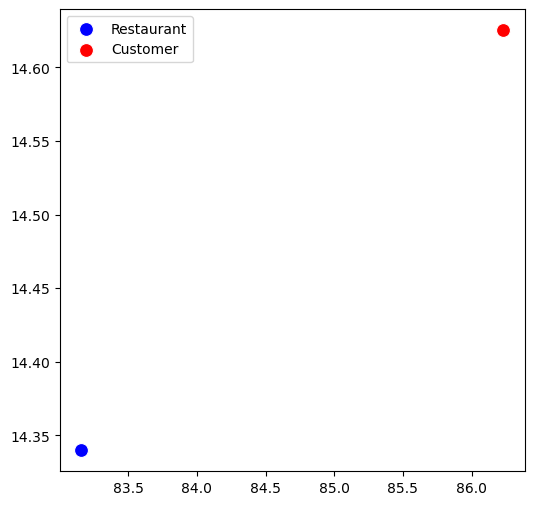

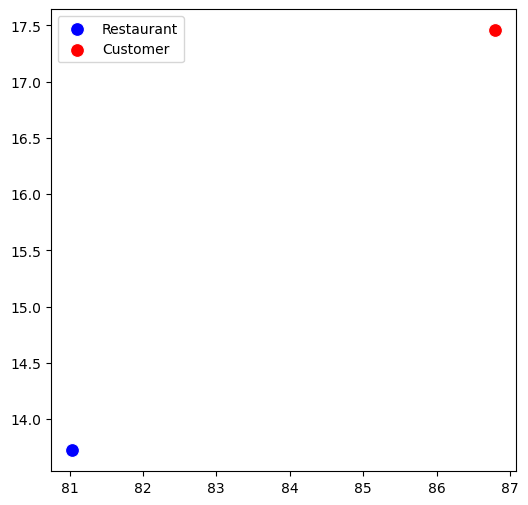

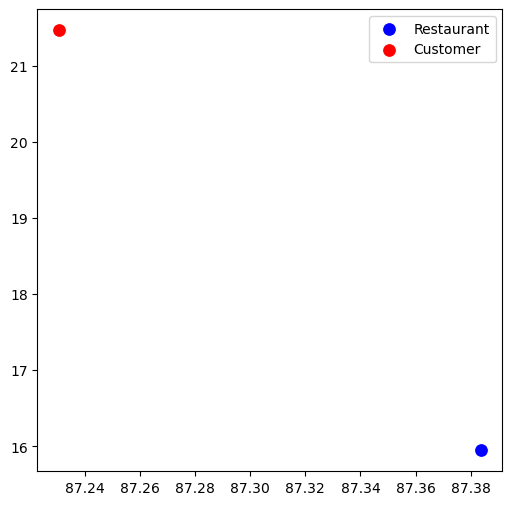

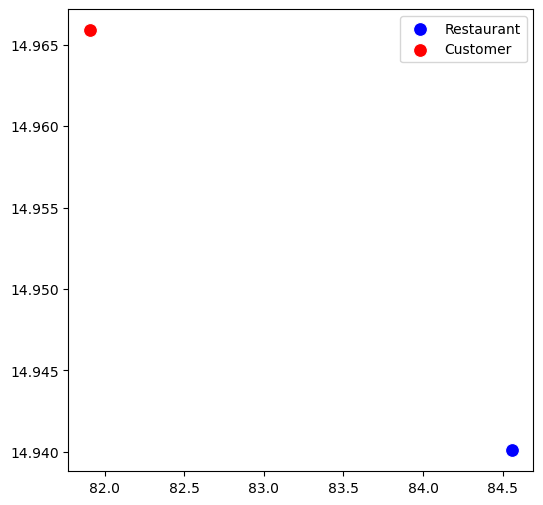

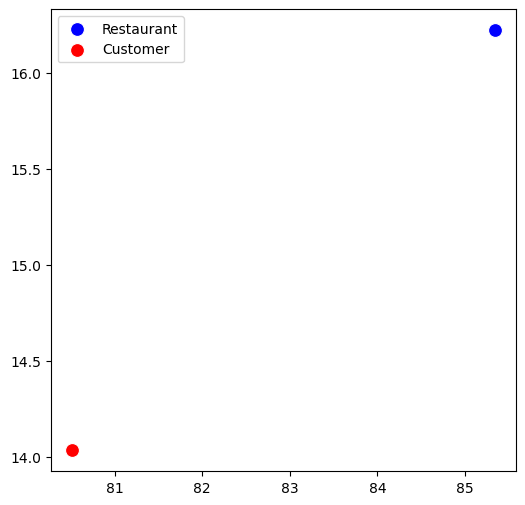

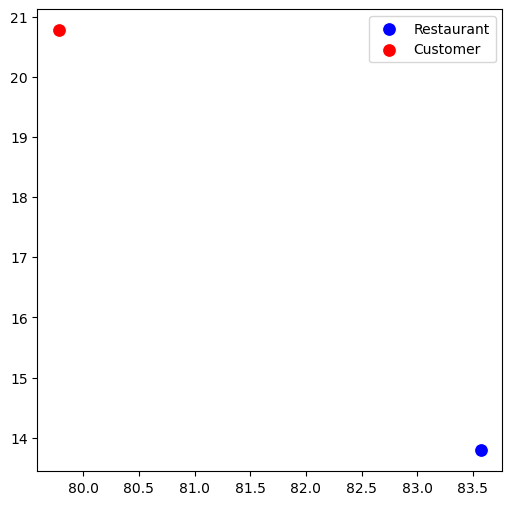

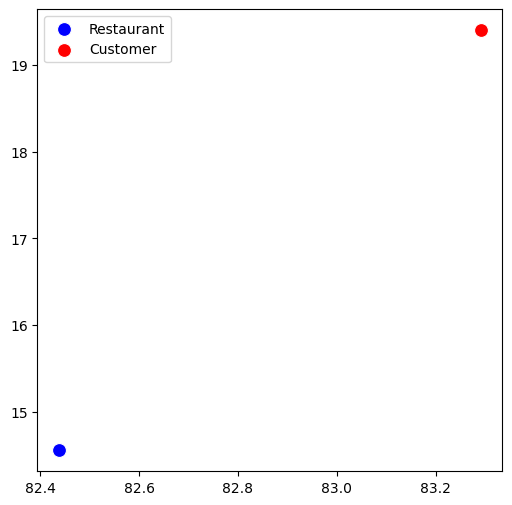

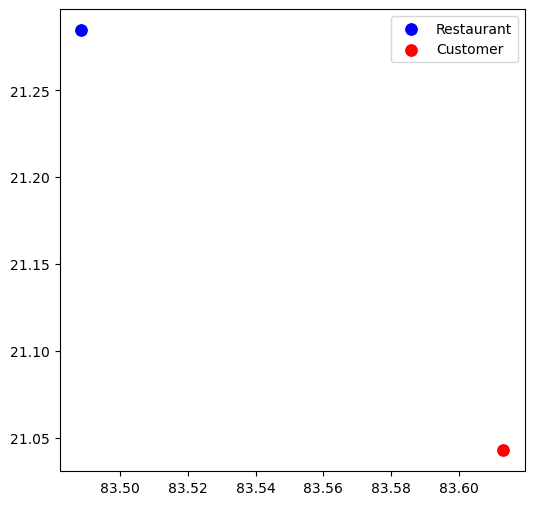

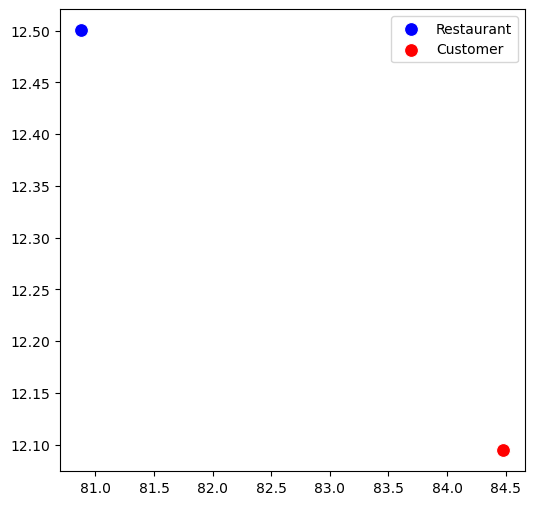

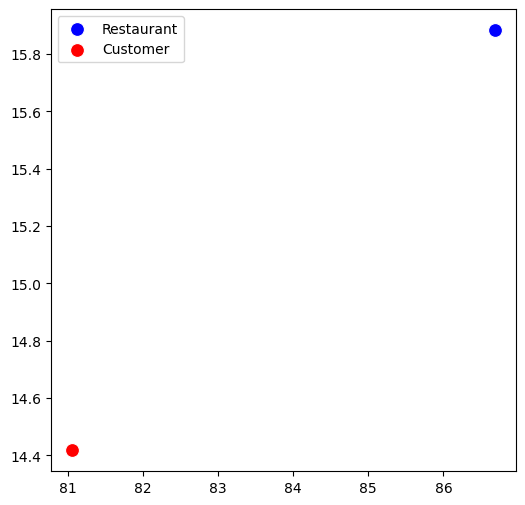

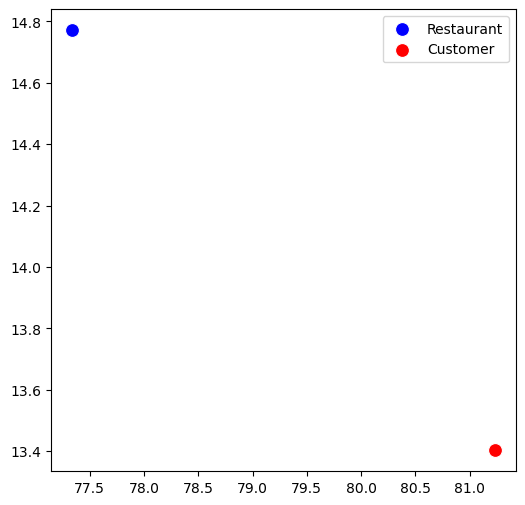

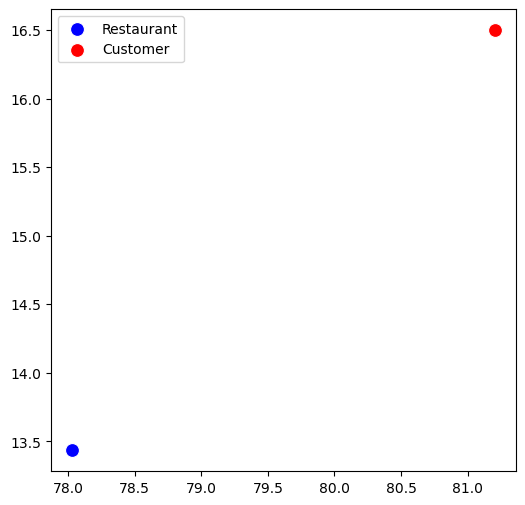

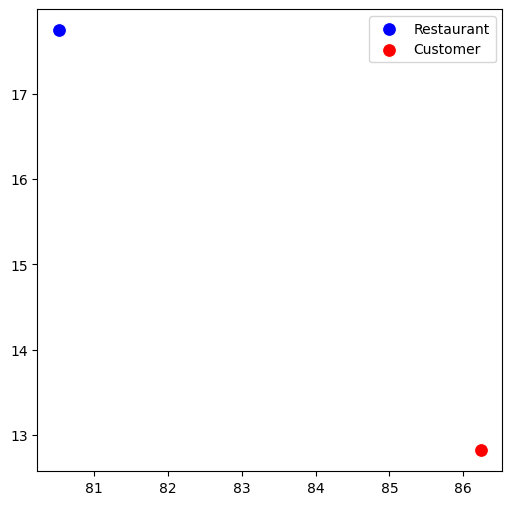

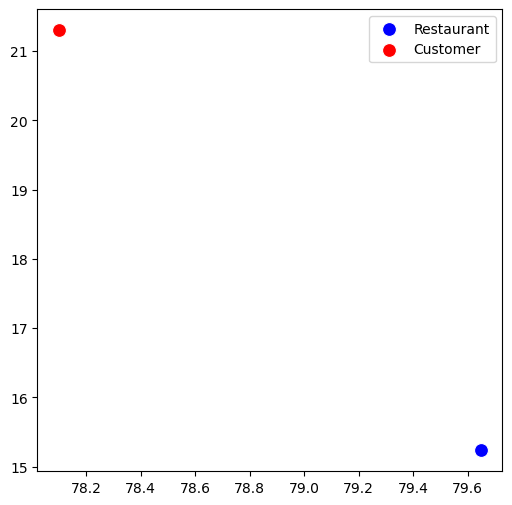

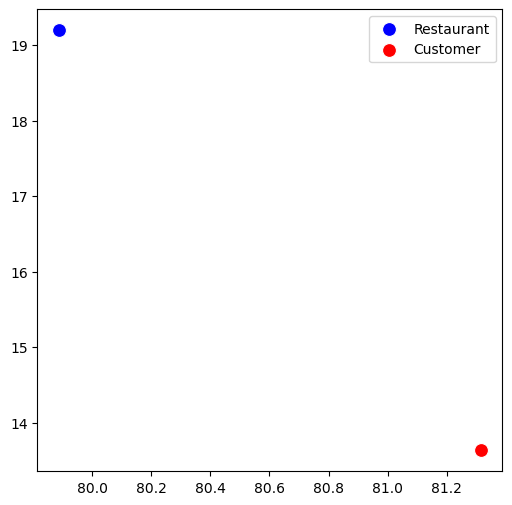

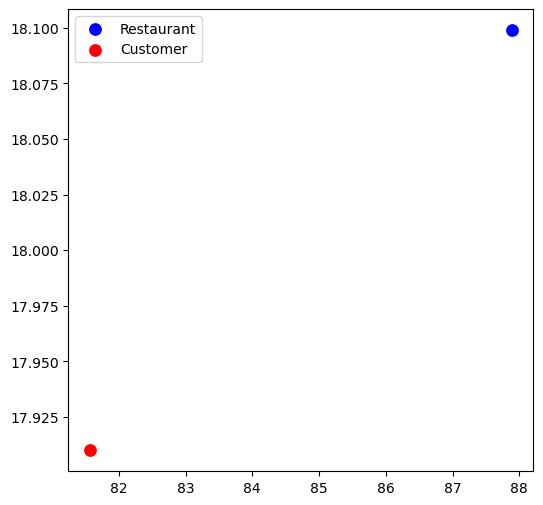

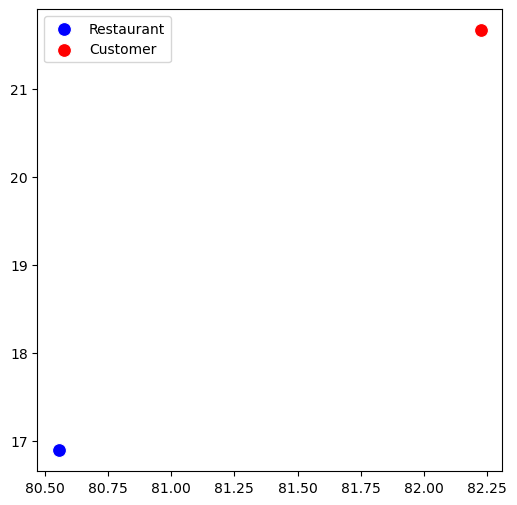

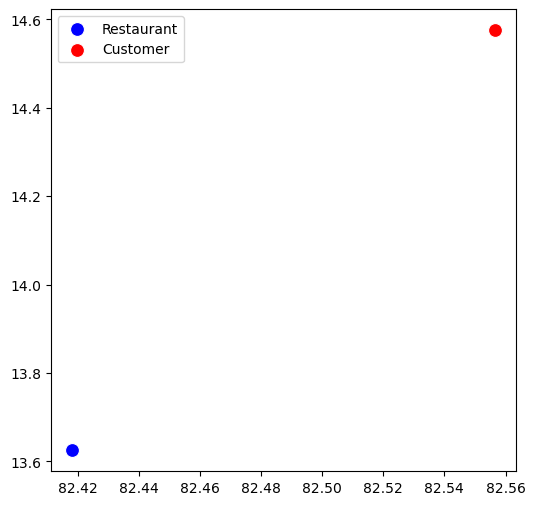

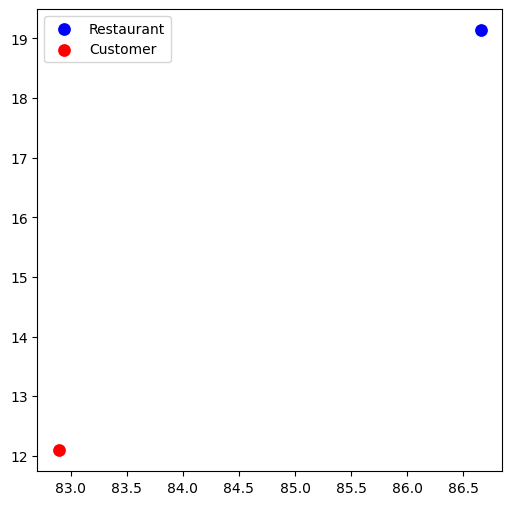

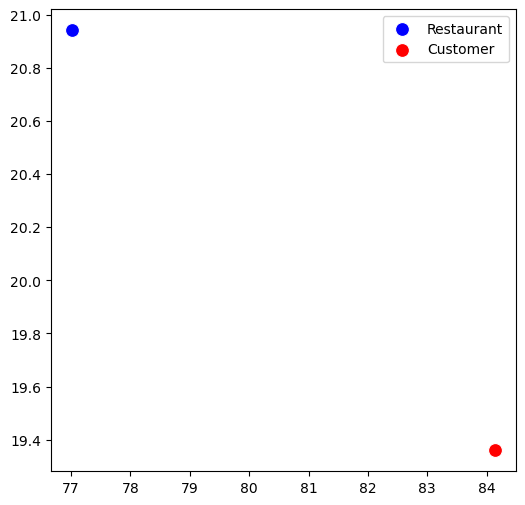

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0,1


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_delivery_image(order_id,cust_lat, cust_long, rest_lat, rest_long):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=[rest_long], y=[rest_lat], color="blue", s=100, label="Restaurant")
    sns.scatterplot(x=[cust_long], y=[cust_lat], color="red", s=100, label="Customer")
    
    plt.legend()
    plt.savefig(f"images/{order_id}.png")  # Save image with unique order_id
    plt.show()
    plt.close()

# Generate images for each order
for _, row in data.iterrows():
    create_delivery_image(row["Order_ID"],row["cust_lat"], row["cust_long"], row["rest_lat"], row["rest_long"])
data

In [65]:
data

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,cust_lat,cust_long,rest_lat,rest_long,distance_km,Delivery_status,Rush_Hour
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,1,2,4,Medium,14,2,...,0.105228,1321.10,81.54,17.030479,79.743077,12.358515,85.100083,775.651198,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,0,2,8,Low,21,2,...,0.453658,152.21,29.02,15.398319,86.639122,14.174874,77.025606,1042.385597,0,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,2,2,9,High,21,1,...,0.317886,1644.38,64.17,15.687342,83.888808,19.594748,82.048482,476.220706,0,1
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,0,1,2,Medium,18,1,...,0.923018,541.25,79.23,20.415599,78.046984,16.915906,78.278698,389.912629,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,1,0,6,Low,21,1,...,0.164209,619.81,2.34,14.786904,78.706532,15.206038,86.203182,806.505886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",0.955701,0,0,8,Medium,21,1,...,0.336653,1432.26,66.34,17.910045,81.561990,18.098924,87.896124,670.130652,0,1
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",0.228466,2,2,8,Low,21,0,...,0.721084,1720.25,40.27,21.664590,82.226635,16.892341,80.554716,558.891202,1,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",0.824036,2,0,4,Medium,14,1,...,0.555056,1356.58,5.10,14.575401,82.556410,13.625369,82.418092,106.686689,0,0
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",0.965546,1,0,9,Low,21,2,...,0.370643,354.39,85.25,12.094497,82.893369,19.135509,86.659978,880.580093,0,1


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.utils import to_categorical

# Load images and labels
def load_images_and_labels(image_dir):
    images = []
    labels = []
    class_labels = {"Fast": 0, "Delayed": 1}

    for filename in os.listdir(image_dir):
        if filename.endswith(".png"):
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64)) / 255.0  # Normalize

            label = 0 if "Fast" in filename else 1  # Assuming labels in filename
            images.append(img)
            labels.append(label)

    images = np.array(images).reshape(-1, 64, 64, 1)
    labels = to_categorical(np.array(labels), num_classes=2)
    return images, labels

# Load dataset
image_dir = "images/"
X, y = load_images_and_labels(image_dir)

# Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y.argmax(axis=1), random_state=42)

# 5-Fold Cross-Validation on Training Set
fold_no = 1
accuracy_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X_train, y_train.argmax(axis=1)): 
    print(f"\nTraining Fold {fold_no}...\n")

    # Get fold-specific training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define CNN model
    model = models.Sequential([
        Input(shape=(64, 64, 1)),  # Explicitly define input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Evaluate on validation set
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)

    print(f"Fold {fold_no} Accuracy: {accuracy:.4f}\n")
    fold_no += 1

# Average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(accuracy_scores):.4f}")

# Final Test Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")



Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9353 - loss: 0.4301 - val_accuracy: 1.0000 - val_loss: 0.1114
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.1074 - val_accuracy: 1.0000 - val_loss: 0.0946
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.0912 - val_accuracy: 1.0000 - val_loss: 0.0805
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0689
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.0665 - val_accuracy: 1.0000 - val_loss: 0.0595
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0520
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0505 - val_accuracy: 1.0000 - val_loss: 0.0461
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 0.0414